# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Argo Wahyu Utomo (Arguto)
- **Email:** argo.wahyu.utomo@gmail.com
- **ID Dicoding:** B244051F

## Menentukan Pertanyaan Bisnis

### Penjualan
1. Bagaimana tren penjualan (orders, revenue, unit, ATV, AUR) selama beberapa bulan terakhir?
2. Kategori produk apa saja yang paling tinggi penjualannya (orders, revenue, unit)?
3. Kategori produk apa saja yang paling rendah penjualannya (orders, revenue, unit)?

### Metode Pembayaran
4. Metode pembayaran apa yang paling sering digunakan?
5. Berapa rata-rata nilai pembayaran untuk setiap metode pembayaran?

### Logistik
6. Seberapa akurat estimasi pengiriman dibandingkan dengan tanggal pengiriman sebenarnya?
7. Berapa nilai minimal, maksimal, dan rata-rata biaya pengiriman per kategori produk secara total dan rata-rata per order?

### Kepuasan Pelanggan
8. Bagaimana tingkat kepuasan pelanggan secara keseluruhan?

### Lokasi Geografis
9. Bagaimana distribusi pelanggan berdasarkan lokasi geografisnya?
10. Bagaimana distribusi penjual berdasarkan lokasi geografisnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat file CSV

In [2]:
dir_ = "dataset/"
file_orders = dir_ + "orders_dataset.csv"
file_products = dir_ + "products_dataset.csv"
file_product_category = dir_ + "product_category_name_translation.csv"
file_items = dir_ + "order_items_dataset.csv"
file_payments = dir_ + "order_payments_dataset.csv"
file_reviews =  dir_ + "order_reviews_dataset.csv"
file_customers = dir_ + "customers_dataset.csv"
file_sellers = dir_ + "sellers_dataset.csv" 
file_geolocation = dir_ + "geolocation_dataset.csv" 

# Load each CSV file into a DataFrame
df_orders = pd.read_csv(file_orders)
df_products = pd.read_csv(file_products)
df_product_category = pd.read_csv(file_product_category)
df_items = pd.read_csv(file_items)
df_payments = pd.read_csv(file_payments)
df_reviews = pd.read_csv(file_reviews)
df_customers = pd.read_csv(file_customers)
df_sellers = pd.read_csv(file_sellers)
df_geolocation = pd.read_csv(file_geolocation)

#### Menampilkan DataFrame

In [3]:
df_dict = {
    "orders": df_orders,
    "products": df_products,
    "product_category": df_product_category,
    "items": df_items,
    "payments": df_payments,
    "reviews": df_reviews,
    "customers": df_customers,
    "sellers": df_sellers,
    "geolocation": df_geolocation, 
}

top_row_count = 3
for table_name, df in df_dict.items():
    print(f"{table_name.title()} (df_{table_name}) top {top_row_count} rows")
    display(df.head(top_row_count))  # Renders in a rich tabular format

Orders (df_orders) top 3 rows


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Products (df_products) top 3 rows


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Product_Category (df_product_category) top 3 rows


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


Items (df_items) top 3 rows


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Payments (df_payments) top 3 rows


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Reviews (df_reviews) top 3 rows


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Customers (df_customers) top 3 rows


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Sellers (df_sellers) top 3 rows


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Geolocation (df_geolocation) top 3 rows


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


#### Insights
- Dataset terdiri dari 9 file csv yang kita muat ke dalam 9 DataFrame, yaitu: df_orders, df_products, df_product_category, df_items, df_payments, df_customers, df_sellers, dan df_geolocation.

### Assessing Data

#### Jumlah Baris & Kolom

In [4]:
# Create a list to store table information
table_dimension = []

# Iterate over the dictionary to collect data
for table_name, df in df_dict.items():
    table_dimension.append({
        "Table": table_name.title(),
        "DataFrame": f"df_{table_name}",
        "Rows": f"{df.shape[0]:,}",
        "Columns": f"{df.shape[1]:,}"
    })

# Create a DataFrame from the collected data
table_dimension_df = pd.DataFrame(table_dimension)

# Display the DataFrame
display(table_dimension_df)

,Table,DataFrame,Rows,Columns
0,Orders,df_orders,"99,441",8
1,Products,df_products,"32,951",9
2,Product_Category,df_product_category,71,2
3,Items,df_items,"112,650",7
4,Payments,df_payments,"103,886",5
5,Reviews,df_reviews,"99,224",7
6,Customers,df_customers,"99,441",5
7,Sellers,df_sellers,"3,095",4
8,Geolocation,df_geolocation,"1,000,163",5


#### Data Type, Missing Values, Unique, Duplicate

In [5]:
# Create a function to show table info
def show_table_info(table_name_or_df, table_name: str = None):
    """
    Display the information of the DataFrame.
    
    Parameters:
        table_name_or_df (str or DataFrame): The name of the DataFrame (as a string) or the DataFrame itself.
        table_name (str, optional): If table_name_or_df is a DataFrame, provide the variable name here.
    """
    if isinstance(table_name_or_df, str):
        df = df_dict.get(table_name_or_df)
        table_name = table_name_or_df
    elif isinstance(table_name_or_df, pd.DataFrame):
        df = table_name_or_df
        if not table_name:
            table_name = "Unnamed DataFrame"
    else:
        raise ValueError("Input must be either a string (table name) or a pandas DataFrame.")
    
    if df is None:
        raise ValueError(f"No DataFrame found for table name: {table_name_or_df}")
    
    # Initialize a list to collect column information
    table_column_info = []
    
    # Get memory usage for each column
    memory_usage = df.memory_usage(deep=True)
    total_memory_usage = memory_usage.sum()

    # Iterate over each column in the DataFrame
    for column_name in df.columns:
        # Collect information about the column
        table_column_info.append({
            "Table": table_name.title(),
            "Column": column_name,
            "DType": df[column_name].dtype,
            "Not-Null": f"{df[column_name].notnull().sum():,}",
            "Missing Values": f"{df[column_name].isnull().sum():,}",
            "Unique": f"{df[column_name].nunique():,}",
            # "Duplicate": df[column_name].duplicated().sum(),
            "Duplicate": "",  # tidak perlu menghitung duplicated data per kolom
            "Memory Usage": memory_usage[column_name],
        })
    
    # Add a row for total memory usage (aggregate row)
    table_column_info.append({
        "Table": table_name.title(),
        "Column": "[Total]",
        "DType": "",
        "Not-Null": f"{df.notnull().all(axis=1).sum():,}",  # Count rows where all columns are non-null
        "Missing Values": f"{df.isnull().any(axis=1).sum():,}",  # Count rows with any null values
        "Unique": f"{df.shape[0] - df.duplicated().sum():,}",  # Count unique rows without dropping duplicates
        "Duplicate": f"{df.duplicated().sum():,}",  # Count total duplicated rows
        "Memory Usage": total_memory_usage,
    })

    # Create a DataFrame from the collected information
    table_column_info_df = pd.DataFrame(table_column_info)

    # Convert memory usage to human-readable format (e.g., KB, MB) if desired
    table_column_info_df["Memory Usage"] = table_column_info_df["Memory Usage"].apply(
        lambda x: (
            f"{x / (1024**3):.2f} GB" if x >= 1024**3 else
            f"{x / (1024**2):.2f} MB" if x >= 1024**2 else
            f"{x / 1024:.2f} KB" if x >= 1024 else
            f"{x} Bytes"
        )
    )

     # Display the DataFrame
    display(table_column_info_df)


**Catatan**
- Total Not-Null adalah jumlah baris yang seluruh kolomnya tidak mengandung missing value
- Total Missing Value adalah jumlah baris yang mengandung sekurang-kurangnya 1 missing value
- Total Unique adalah jumlah baris unik berdasarkan nilai seluruh kolom
- Total Duplicate adalah jumlah baris yang duplicated berdasarkan nilai dari seluruh kolom
- Tidak perlu menghitung jumlah duplicate pada tiap kolom

##### df_orders

In [6]:
show_table_info("orders")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Orders,order_id,object,"99,441",0,"99,441",,7.68 MB
1,Orders,customer_id,object,"99,441",0,"99,441",,7.68 MB
2,Orders,order_status,object,"99,441",0,8,,5.50 MB
3,Orders,order_purchase_timestamp,object,"99,441",0,"98,875",,6.45 MB
4,Orders,order_approved_at,object,"99,281",160,"90,733",,6.44 MB
5,Orders,order_delivered_carrier_date,object,"97,658","1,783","81,018",,6.39 MB
6,Orders,order_delivered_customer_date,object,"96,476","2,965","95,664",,6.35 MB
7,Orders,order_estimated_delivery_date,object,"99,441",0,459,,6.45 MB
8,Orders,[Total],,"96,461","2,980","99,441",0,52.94 MB


**Insight:**
- Tabel orders (df_orders) memiliki 8 kolom
- tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` masih perlu diubah di tahap selanjutnya (data cleaning)
- kolom `order_approved_at` mengandung missing value, kemungkinan besar karena order memang belum di-approve
- kolom `order_delivered_carrier_date` dan `order_delivered_customer_date` juga mengandung missing value, kemungkinan besar karena order belum dikirim atau data delivery memang belum saatnya terisi
- tidak terdapat data duplikat
- terdapat 99,441 pesanan berbeda dengan 8 status berbeda dari 99,441 pelanggan
- dari seluruh pesanan, baru terdapat 90,733 pesanan yang disetujui 

##### df_products

In [7]:
show_table_info("products")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Products,product_id,object,"32,951",0,"32,951",,2.55 MB
1,Products,product_category_name,object,"32,341",610,73,,1.99 MB
2,Products,product_name_lenght,float64,"32,341",610,66,,257.43 KB
3,Products,product_description_lenght,float64,"32,341",610,"2,960",,257.43 KB
4,Products,product_photos_qty,float64,"32,341",610,19,,257.43 KB
5,Products,product_weight_g,float64,"32,949",2,"2,204",,257.43 KB
6,Products,product_length_cm,float64,"32,949",2,99,,257.43 KB
7,Products,product_height_cm,float64,"32,949",2,102,,257.43 KB
8,Products,product_width_cm,float64,"32,949",2,95,,257.43 KB
9,Products,[Total],,"32,340",611,"32,951",0,6.30 MB


**Insight:**
- tabel products (df_products) memiliki 9 kolom
- tipe data semua kolom sudah OK
- banyak terdapat missing values
- tidak terdapat data duplikat
- terdapat 32,951 produk

##### df_product_category

In [8]:
show_table_info("product_category")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Product_Category,product_category_name,object,71,0,71,,4.57 KB
1,Product_Category,product_category_name_english,object,71,0,71,,4.51 KB
2,Product_Category,[Total],,71,0,71,0,9.21 KB


**Insight:**
- tabel product_category (df_product_category) memiliki 2 kolom
- tipe data seluruh kolom sudah OK
- tidak terdapat missing value
- tidak terdapat data duplikat
- terdapat 71 kategori produk

##### df_items

In [9]:
show_table_info("items")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Items,order_id,object,"112,650",0,"98,666",,8.70 MB
1,Items,order_item_id,int64,"112,650",0,21,,880.08 KB
2,Items,product_id,object,"112,650",0,"32,951",,8.70 MB
3,Items,seller_id,object,"112,650",0,"3,095",,8.70 MB
4,Items,shipping_limit_date,object,"112,650",0,"93,318",,7.31 MB
5,Items,price,float64,"112,650",0,"5,968",,880.08 KB
6,Items,freight_value,float64,"112,650",0,"6,999",,880.08 KB
7,Items,[Total],,"112,650",0,"112,650",0,35.99 MB


In [10]:
unique_order_item_id = df_items['order_item_id'].unique()
print(unique_order_item_id)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


**Insight:**
- tabel items (df_items) memiliki 7 kolom
- tipe data `order_item_id` dan `shipping_limit_date` perlu diubah
- tidak terdapat missing value
- tidak terdapat data duplikat
- unique value data `order_item_id` kenapa sangat sedikit ya? -> mungkin ID nya hanya unique per order_id, tidak unique terhadap seluruh tabel 

##### df_payments

In [11]:
show_table_info("payments")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Payments,order_id,object,"103,886",0,"99,440",,8.02 MB
1,Payments,payment_sequential,int64,"103,886",0,29,,811.61 KB
2,Payments,payment_type,object,"103,886",0,5,,5.83 MB
3,Payments,payment_installments,int64,"103,886",0,24,,811.61 KB
4,Payments,payment_value,float64,"103,886",0,"29,077",,811.61 KB
5,Payments,[Total],,"103,886",0,"103,886",0,16.23 MB


**Insight:**
- tabel payments (df_payments) memiliki 5 kolom
- tipe data seluruh kolom sudah OK
- tidak terdapat missing values
- tidak terdapat data duplikat
- terdapat 103,886 pembayaran untuk 99,440 order berbeda dengan 5 pilihan tipe pembayaran

##### df_reviews

In [12]:
show_table_info("reviews")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Reviews,review_id,object,"99,224",0,"98,410",,7.66 MB
1,Reviews,order_id,object,"99,224",0,"98,673",,7.66 MB
2,Reviews,review_score,int64,"99,224",0,5,,775.19 KB
3,Reviews,review_comment_title,object,"11,568","87,656","4,527",,3.39 MB
4,Reviews,review_comment_message,object,"40,977","58,247","36,159",,6.78 MB
5,Reviews,review_creation_date,object,"99,224",0,636,,6.43 MB
6,Reviews,review_answer_timestamp,object,"99,224",0,"98,248",,6.43 MB
7,Reviews,[Total],,"9,839","89,385","99,224",0,39.12 MB


**Insight:**
- tabel reviews (df_reviews) memiliki 7 kolom
- tipe data `review_creation_date` dan `review_answer_timestamp` perlu disesuaikan
- terdapat 89,385 baris dengan missing values
- kolom `review_comment_title` memiliki 87,656 missing values
- kolom `review_comment_message` memiliki 58,247 missing values
- tidak terdapat data duplikat
- terdapat 98,410 review dari 98,673 order berbeda dengan 5 pilihan score

##### df_customers

In [13]:
show_table_info("customers")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Customers,customer_id,object,"99,441",0,"99,441",,7.68 MB
1,Customers,customer_unique_id,object,"99,441",0,"96,096",,7.68 MB
2,Customers,customer_zip_code_prefix,int64,"99,441",0,"14,994",,776.88 KB
3,Customers,customer_city,object,"99,441",0,"4,119",,5.63 MB
4,Customers,customer_state,object,"99,441",0,27,,4.84 MB
5,Customers,[Total],,"99,441",0,"99,441",0,26.59 MB


**Insight:**
- tabel customers (df_customerss) memiliki 5 kolom
- tipe data `customer_zip_code_prefix` lebih tepat jika diubah ke string/object
- tidak terdapat missing values
- tidak terdapat data duplikat
- terdapat 99,441 pelanggan dengan 14,994 kode pos berbeda dari 4,119 kota dan 27 state

##### df_sellers

In [14]:
show_table_info("sellers")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Sellers,seller_id,object,"3,095",0,"3,095",,244.82 KB
1,Sellers,seller_zip_code_prefix,int64,"3,095",0,"2,246",,24.18 KB
2,Sellers,seller_city,object,"3,095",0,611,,178.89 KB
3,Sellers,seller_state,object,"3,095",0,23,,154.15 KB
4,Sellers,[Total],,"3,095",0,"3,095",0,602.16 KB


**Insight:**
- tabel sellers (df_sellers) memiliki 4 kolom
- tipe data `seller_zip_code_prefix` lebih tepat jika diubah ke string/object
- tidak terdapat missing values
- tidak terdapat data duplikat
- terdapat 3,095 penjual dengan 2,246 kode pos berbeda dari 611 kota dan 23 state

##### df_geolocation

In [15]:
show_table_info("geolocation")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Geolocation,geolocation_zip_code_prefix,int64,"1,000,163",0,"19,015",,7.63 MB
1,Geolocation,geolocation_lat,float64,"1,000,163",0,"717,360",,7.63 MB
2,Geolocation,geolocation_lng,float64,"1,000,163",0,"717,613",,7.63 MB
3,Geolocation,geolocation_city,object,"1,000,163",0,"8,011",,57.84 MB
4,Geolocation,geolocation_state,object,"1,000,163",0,27,,48.65 MB
5,Geolocation,[Total],,"1,000,163",0,"738,332","261,831",129.38 MB


**Insight:**
- tabel geolocation (df_geolocation) memiliki 5 kolom
- tipe data `geolocation_zip_code_prefix` lebih tepat jika diubah ke string/object
- tidak terdapat missing values
- terdapat data duplikat sebanyak 261,831
- jumlah unique geolocation: 738,332

#### Descriptive Statistics, Potential Outliers

In [16]:
# Create a function to show table description
def get_table_desc(table_name_or_df, table_name: str = None):
    """
    Display the description of the DataFrame.
    
    Parameters:
        table_name_or_df (str or DataFrame): The name of the DataFrame (as a string) or the DataFrame itself.
        table_name (str, optional): If table_name_or_df is a DataFrame, provide the variable name here.
    """
    if isinstance(table_name_or_df, str):
        df = df_dict.get(table_name_or_df)
        table_name = table_name_or_df
    elif isinstance(table_name_or_df, pd.DataFrame):
        df = table_name_or_df
        if not table_name:
            table_name = "Unnamed DataFrame"
    else:
        raise ValueError("Input must be either a string (table name) or a pandas DataFrame.")
    
    if df is None:
        raise ValueError(f"No DataFrame found for table name: {table_name_or_df}")
    
    # Initialize a list to collect column information
    table_desc = []

    # Iterate over each column in the DataFrame
    for column_name in df.columns:
        # Initialize a dictionary to hold the statistics for each column
        desc = {
            "Table": table_name.title(),
            "Column": column_name,
            "Dtype": str(df[column_name].dtype)
        }
        
        # If the column is numeric, calculate the statistics
        if df[column_name].dtype in ['int64', 'float64']:
            desc["Min"] = f"{df[column_name].min():,.2f}"
            desc["Max"] = f"{df[column_name].max():,.2f}"
            desc["Mean"] = f"{df[column_name].mean():,.2f}"
            desc["Q1"] = f"{df[column_name].quantile(0.25):,.2f}"
            desc["Q2"] = f"{df[column_name].median():,.2f}"
            desc["Q3"] = f"{df[column_name].quantile(0.75):,.2f}"
        elif np.issubdtype(df[column_name].dtype, np.datetime64):
            desc["Min"] = df[column_name].min().strftime("%Y-%m-%d %H:%M:%S")
            desc["Max"] = df[column_name].max().strftime("%Y-%m-%d %H:%M:%S")
        else:
            # For non-numeric columns, only include relevant statistics
            # desc["Mode"] = df[column_name].mode()[0]  # Most frequent value (mode) for non-numeric columns
            desc["Unique"] = f"{df[column_name].nunique():,}"
            desc["Sample Value"] = ', '.join(df[column_name].unique()[:1].astype(str))
        
        # Append the column statistics to the list
        table_desc.append(desc)

    # Create a DataFrame from the collected column descriptions
    table_desc_df = pd.DataFrame(table_desc)
    
    # Remove columns that contain all None values
    columns_to_keep = [col for col in table_desc_df.columns 
                      if not table_desc_df[col].isna().all()]
    
    table_desc_df = table_desc_df.fillna("")
    table_desc_df = table_desc_df[columns_to_keep]

    # Return the DataFrame
    return table_desc_df


def show_table_desc(*args):
    """
    Show the description of a table by displaying the output of get_table_desc.
    
    This function handles both the table name (string) and DataFrame as input.
    """
    display(get_table_desc(*args))


##### df_orders

In [17]:
show_table_desc("orders")

,Table,Column,Dtype,Unique,Sample Value
0,Orders,order_id,object,"99,441",e481f51cbdc54678b7cc49136f2d6af7
1,Orders,customer_id,object,"99,441",9ef432eb6251297304e76186b10a928d
2,Orders,order_status,object,8,delivered
3,Orders,order_purchase_timestamp,object,"98,875",2017-10-02 10:56:33
4,Orders,order_approved_at,object,"90,733",2017-10-02 11:07:15
5,Orders,order_delivered_carrier_date,object,"81,018",2017-10-04 19:55:00
6,Orders,order_delivered_customer_date,object,"95,664",2017-10-10 21:25:13
7,Orders,order_estimated_delivery_date,object,459,2017-10-18 00:00:00


**Insights:**
- Perlu mengubah tipe data beberapa kolom untuk bisa menghitung angka statistik deskriptifnya

##### df_products

In [18]:
show_table_desc("products")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Products,product_id,object,"32,951",1e9e8ef04dbcff4541ed26657ea517e5,,,,,,
1,Products,product_category_name,object,73,perfumaria,,,,,,
2,Products,product_name_lenght,float64,,,5.00,76.00,48.48,42.00,51.00,57.00
3,Products,product_description_lenght,float64,,,4.00,"3,992.00",771.50,339.00,595.00,972.00
4,Products,product_photos_qty,float64,,,1.00,20.00,2.19,1.00,1.00,3.00
5,Products,product_weight_g,float64,,,0.00,"40,425.00","2,276.47",300.00,700.00,"1,900.00"
6,Products,product_length_cm,float64,,,7.00,105.00,30.82,18.00,25.00,38.00
7,Products,product_height_cm,float64,,,2.00,105.00,16.94,8.00,13.00,21.00
8,Products,product_width_cm,float64,,,6.00,118.00,23.20,15.00,20.00,30.00


**Insights:**
- Kelihatannya sudah OK, nanti kalau ada kolom yang memang diperlukan untuk analisis baru kita bisa cek lebih lanjut

##### df_product_category

In [19]:
show_table_desc("product_category")

,Table,Column,Dtype,Unique,Sample Value
0,Product_Category,product_category_name,object,71,beleza_saude
1,Product_Category,product_category_name_english,object,71,health_beauty


**Insights:**
- Kelihatannya sudah OK

##### df_items

In [20]:
show_table_desc("items")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Items,order_id,object,"98,666",00010242fe8c5a6d1ba2dd792cb16214,,,,,,
1,Items,order_item_id,int64,,,1.00,21.00,1.20,1.00,1.00,1.00
2,Items,product_id,object,"32,951",4244733e06e7ecb4970a6e2683c13e61,,,,,,
3,Items,seller_id,object,"3,095",48436dade18ac8b2bce089ec2a041202,,,,,,
4,Items,shipping_limit_date,object,"93,318",2017-09-19 09:45:35,,,,,,
5,Items,price,float64,,,0.85,"6,735.00",120.65,39.90,74.99,134.90
6,Items,freight_value,float64,,,0.00,409.68,19.99,13.08,16.26,21.15


**Insights:**
- Kita perlu convert tipe data `shipping_limit_date` untuk menghitung statistik deskriptifnya & melihat potensi outlier

##### df_payments

In [21]:
show_table_desc("payments")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Payments,order_id,object,"99,440",b81ef226f3fe1789b1e8b2acac839d17,,,,,,
1,Payments,payment_sequential,int64,,,1.00,29.00,1.09,1.00,1.00,1.00
2,Payments,payment_type,object,5,credit_card,,,,,,
3,Payments,payment_installments,int64,,,0.00,24.00,2.85,1.00,1.00,4.00
4,Payments,payment_value,float64,,,0.00,"13,664.08",154.10,56.79,100.00,171.84


**Insights:**
- `payment_sequential` perlu dicek lebih lanjut distribusinya, Q1 = Q2 = Q3 = 1, namun nilai Max 29 (potensi outlier, namun belum tentu outlier)
- `payment_installment` perlu dicek lebih lanjut distribusinya (potensi outlier di nilai Max)
- kedua hal di atas untuk sementara bisa diabaikan jika kolom-kolom tersebut belum diperlukan dalam analisis

##### df_reviews

In [22]:
show_table_desc("reviews")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Reviews,review_id,object,"98,410",7bc2406110b926393aa56f80a40eba40,,,,,,
1,Reviews,order_id,object,"98,673",73fc7af87114b39712e6da79b0a377eb,,,,,,
2,Reviews,review_score,int64,,,1.00,5.00,4.09,4.00,5.00,5.00
3,Reviews,review_comment_title,object,"4,527",nan,,,,,,
4,Reviews,review_comment_message,object,"36,159",nan,,,,,,
5,Reviews,review_creation_date,object,636,2018-01-18 00:00:00,,,,,,
6,Reviews,review_answer_timestamp,object,"98,248",2018-01-18 21:46:59,,,,,,


**Insights:**
- kolom `review_creation_date` dan `review_answer_timestamp` perlu diubah dulu tipe datanya untuk menghitung statistik deskriptifnya dan melihat potensi outlier

##### df_customers

In [23]:
show_table_desc("customers")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Customers,customer_id,object,"99,441",06b8999e2fba1a1fbc88172c00ba8bc7,,,,,,
1,Customers,customer_unique_id,object,"96,096",861eff4711a542e4b93843c6dd7febb0,,,,,,
2,Customers,customer_zip_code_prefix,int64,,,"1,003.00","99,990.00","35,137.47","11,347.00","24,416.00","58,900.00"
3,Customers,customer_city,object,"4,119",franca,,,,,,
4,Customers,customer_state,object,27,SP,,,,,,


**Insights:**
- Selain issue tipe data kolom `customer_zip_code_prefix`, kelihatannya sudah OK

##### df_sellers

In [24]:
show_table_desc("sellers")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Sellers,seller_id,object,"3,095",3442f8959a84dea7ee197c632cb2df15,,,,,,
1,Sellers,seller_zip_code_prefix,int64,,,"1,001.00","99,730.00","32,291.06","7,093.50","14,940.00","64,552.50"
2,Sellers,seller_city,object,611,campinas,,,,,,
3,Sellers,seller_state,object,23,SP,,,,,,


**Insights:**
- Selain issue tipe data kolom `seller_zip_code_prefix`, kelihatannya sudah OK

##### df_geolocation

In [25]:
show_table_desc("geolocation")

,Table,Column,Dtype,Min,Max,Mean,Q1,Q2,Q3,Unique,Sample Value
0,Geolocation,geolocation_zip_code_prefix,int64,"1,001.00","99,990.00","36,574.17","11,075.00","26,530.00","63,504.00",,
1,Geolocation,geolocation_lat,float64,-36.61,45.07,-21.18,-23.60,-22.92,-19.98,,
2,Geolocation,geolocation_lng,float64,-101.47,121.11,-46.39,-48.57,-46.64,-43.77,,
3,Geolocation,geolocation_city,object,,,,,,,"8,011",sao paulo
4,Geolocation,geolocation_state,object,,,,,,,27,SP


**Insights:**
- Selain issue tipe data `geolocation_zip_code_prefix`, kelihatannya sudah OK

### Cleaning Data

#### Convert Data Type

##### df_orders

In [26]:
# List of columns whose data type will be converted 
datetime_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

# Convert the specified columns to datetime
for column in datetime_columns:
    df_orders[column] = pd.to_datetime(df_orders[column], errors='coerce')  # 'coerce' will set invalid parsing to NaT

# Verify the change
show_table_desc("orders")

,Table,Column,Dtype,Unique,Sample Value,Min,Max
0,Orders,order_id,object,"99,441",e481f51cbdc54678b7cc49136f2d6af7,,
1,Orders,customer_id,object,"99,441",9ef432eb6251297304e76186b10a928d,,
2,Orders,order_status,object,8,delivered,,
3,Orders,order_purchase_timestamp,datetime64[ns],,,2016-09-04 21:15:19,2018-10-17 17:30:18
4,Orders,order_approved_at,datetime64[ns],,,2016-09-15 12:16:38,2018-09-03 17:40:06
5,Orders,order_delivered_carrier_date,datetime64[ns],,,2016-10-08 10:34:01,2018-09-11 19:48:28
6,Orders,order_delivered_customer_date,datetime64[ns],,,2016-10-11 13:46:32,2018-10-17 13:22:46
7,Orders,order_estimated_delivery_date,datetime64[ns],,,2016-09-30 00:00:00,2018-11-12 00:00:00


**Insight:**
- tipe data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` sudah benar

##### df_items

In [27]:
# List of columns whose data type will be converted 
datetime_columns = [
    'shipping_limit_date', 
]
object_columns = [
    'order_item_id',
]

# Convert the specified columns to datetime
for column in datetime_columns:
    df_items[column] = pd.to_datetime(df_items[column], errors='coerce')  # 'coerce' will set invalid parsing to NaT

# Convert the specified columns to string
for column in object_columns:
    df_items[column] = df_items[column].astype(str)

# Verify the change
show_table_desc("items")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Items,order_id,object,"98,666",00010242fe8c5a6d1ba2dd792cb16214,,,,,,
1,Items,order_item_id,object,21,1,,,,,,
2,Items,product_id,object,"32,951",4244733e06e7ecb4970a6e2683c13e61,,,,,,
3,Items,seller_id,object,"3,095",48436dade18ac8b2bce089ec2a041202,,,,,,
4,Items,shipping_limit_date,datetime64[ns],,,2016-09-19 00:15:34,2020-04-09 22:35:08,,,,
5,Items,price,float64,,,0.85,"6,735.00",120.65,39.90,74.99,134.90
6,Items,freight_value,float64,,,0.00,409.68,19.99,13.08,16.26,21.15


**Insight:**
- tipe data kolom `order_item_id` dan `shipping_limit_date` sudah benar

##### df_reviews

In [28]:
# List of columns whose data type will be converted 
datetime_columns = [
    'review_creation_date',
    'review_answer_timestamp',
]

# Convert the specified columns to datetime
for column in datetime_columns:
    df_reviews[column] = pd.to_datetime(df_reviews[column], errors='coerce')  # 'coerce' will set invalid parsing to NaT

# df_reviews['review_creation_date'] = df_reviews['review_creation_date'].dt.date  # wrong, it will converts to objects

# Verify the change
show_table_desc("reviews")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Reviews,review_id,object,"98,410",7bc2406110b926393aa56f80a40eba40,,,,,,
1,Reviews,order_id,object,"98,673",73fc7af87114b39712e6da79b0a377eb,,,,,,
2,Reviews,review_score,int64,,,1.00,5.00,4.09,4.00,5.00,5.00
3,Reviews,review_comment_title,object,"4,527",nan,,,,,,
4,Reviews,review_comment_message,object,"36,159",nan,,,,,,
5,Reviews,review_creation_date,datetime64[ns],,,2016-10-02 00:00:00,2018-08-31 00:00:00,,,,
6,Reviews,review_answer_timestamp,datetime64[ns],,,2016-10-07 18:32:28,2018-10-29 12:27:35,,,,


**Insight:**
- tipe data kolom `review_creation_date` dan `review_answer_timestamp` sudah benar

##### df_customers

In [29]:
# List of columns whose data type will be converted to string
object_columns = [
    'customer_zip_code_prefix',
]

# Convert the specified columns to string
for column in object_columns:
    df_customers[column] = df_customers[column].astype(str)

# Verify the change
show_table_desc("customers")

,Table,Column,Dtype,Unique,Sample Value
0,Customers,customer_id,object,"99,441",06b8999e2fba1a1fbc88172c00ba8bc7
1,Customers,customer_unique_id,object,"96,096",861eff4711a542e4b93843c6dd7febb0
2,Customers,customer_zip_code_prefix,object,"14,994",14409
3,Customers,customer_city,object,"4,119",franca
4,Customers,customer_state,object,27,SP


**Insight:**
- tipe data kolom `customer_zip_code_prefix` sudah benar

##### df_sellers

In [30]:
# List of columns whose data type will be converted to string
object_columns = [
    'seller_zip_code_prefix',
]

# Convert the specified columns to string
for column in object_columns:
    df_sellers[column] = df_sellers[column].astype(str)

# Verify the change
show_table_desc("sellers")

,Table,Column,Dtype,Unique,Sample Value
0,Sellers,seller_id,object,"3,095",3442f8959a84dea7ee197c632cb2df15
1,Sellers,seller_zip_code_prefix,object,"2,246",13023
2,Sellers,seller_city,object,611,campinas
3,Sellers,seller_state,object,23,SP


**Insight:**
- tipe data kolom `seller_zip_code_prefix` sudah benar

##### df_geolocation

In [31]:
# List of columns whose data type will be converted to string
object_columns = [
    'geolocation_zip_code_prefix',
]

# Convert the specified columns to string
for column in object_columns:
    df_geolocation[column] = df_geolocation[column].astype(str)

# Verify the change
show_table_desc("geolocation")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Geolocation,geolocation_zip_code_prefix,object,"19,015",1037,,,,,,
1,Geolocation,geolocation_lat,float64,,,-36.61,45.07,-21.18,-23.60,-22.92,-19.98
2,Geolocation,geolocation_lng,float64,,,-101.47,121.11,-46.39,-48.57,-46.64,-43.77
3,Geolocation,geolocation_city,object,"8,011",sao paulo,,,,,,
4,Geolocation,geolocation_state,object,27,SP,,,,,,


**Insight:**
- tipe data kolom `geolocation_zip_code_prefix` sudah benar

#### Handle Missing Values

##### df_orders

In [32]:
# Display rows where 'order_approved_at' is null
df_orders_null_approved = df_orders[df_orders['order_approved_at'].isnull()]
df_orders_null_approved.groupby('order_status')['order_id'].nunique()

order_status
canceled     141
created        5
delivered     14
Name: order_id, dtype: int64

In [33]:
df_orders.groupby('order_status')['order_id'].nunique()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

**Insights**
- Seluruh order dengan status 'created' memiliki missing value pada kolom `order_approved_at`, hal ini wajar karena order dengan status 'created' memang belum disetujui
- Yang menjadi pertanyaan adalah kenapa sebagian order dengan status 'canceled' & 'delivered' juga memiliki missing values di kolom `order_approved_at`?
- Untuk saat ini kita tidak perlu menghapus baris dengan missing value ini karena masih bisa kita asumsikan sebagai catatan order yang valid mengingat seluruh order_id sudah unique (hal ini juga berlaku untuk missing value di kolom `order_delivered_carrier_date` dan `order_delivered_customer_date`)

##### df_products

In [34]:
df_products['product_category_name'] = df_products['product_category_name'].fillna('[uncategorized]')
show_table_info("products")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Products,product_id,object,"32,951",0,"32,951",,2.55 MB
1,Products,product_category_name,object,"32,951",0,74,,2.01 MB
2,Products,product_name_lenght,float64,"32,341",610,66,,257.43 KB
3,Products,product_description_lenght,float64,"32,341",610,"2,960",,257.43 KB
4,Products,product_photos_qty,float64,"32,341",610,19,,257.43 KB
5,Products,product_weight_g,float64,"32,949",2,"2,204",,257.43 KB
6,Products,product_length_cm,float64,"32,949",2,99,,257.43 KB
7,Products,product_height_cm,float64,"32,949",2,102,,257.43 KB
8,Products,product_width_cm,float64,"32,949",2,95,,257.43 KB
9,Products,[Total],,"32,340",611,"32,951",0,6.32 MB


**Insights**
- Missing values di product_category_name sebanyak 610 baris kita isi dengan value '[uncategorized]', kategori baru ini selanjutnya perlu kita tambahkan ke tabel product_category supaya dapat pasangan `product_category_name_english`nya
- Jumlah unique value untuk product_category_name sebanyak 74, sedangkan di tabel product_category hanya ada 72, sehingga perlu kita tambahkan kedua kategori ini ke tabel product_category supaya dapat pasangan `product_category_name_english`nya juga
- Missing values di kolom yang lain untuk saat ini bisa kita abaikan karena tidak relevan dengan tujuan analisis saat ini

##### df_product_category

In [35]:
df_product_category.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [36]:
show_table_info("product_category")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Product_Category,product_category_name,object,71,0,71,,4.57 KB
1,Product_Category,product_category_name_english,object,71,0,71,,4.51 KB
2,Product_Category,[Total],,71,0,71,0,9.21 KB


In [37]:
# Create a new row as a dictionary
new_row = {'product_category_name': '[uncategorized]', 'product_category_name_english': '[uncategorized]'}

# Convert the single row dictionary to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame
df_product_category = pd.concat([df_product_category, new_row_df], ignore_index=True)

df_product_category.tail()

,product_category_name,product_category_name_english
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,[uncategorized],[uncategorized]


In [38]:
# Update the df_dict to reflect the changes
# It is needed because adding a row creates a new DataFrame,
# which requires updating the reference in df_dict.
df_dict["product_category"] = df_product_category

In [39]:
show_table_info("product_category")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Product_Category,product_category_name,object,72,0,72,,4.64 KB
1,Product_Category,product_category_name_english,object,72,0,72,,4.57 KB
2,Product_Category,[Total],,72,0,72,0,9.34 KB


**Insight:**
- kita sudah menambahkan satu kategori baru `[uncategorized]` ke dalam tabel product_category (df_product_category) supaya terintegrasi dengan perubahan pada tabel sebelumnya yaitu tabel produk (df_products)

In [40]:
# Get set of product_category_name from df_products
product_category_from_products = set(df_products['product_category_name'].unique())

# # Get set of product_category_name from df_product_category
product_category = set(df_product_category['product_category_name'].unique())

# # Find the difference (product categories in df_orders but not in df_product_category)
df_product_category_no_english = product_category_from_products.difference(product_category)
df_product_category_no_english

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [41]:
# Let's put the English translation for those two category into df_product_category
# Define the new rows to be added with both category name and English translation
new_rows = [
    {'product_category_name': 'pc_gamer', 'product_category_name_english': 'pc_gamer'},
    {'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english': 'portable_kitchen_and_food_preparers'}
]

# Convert the rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to the existing df_product_category DataFrame
df_product_category = pd.concat([df_product_category, new_rows_df], ignore_index=True)

# Reassign the updated DataFrame back to the df_dict
df_dict["product_category"] = df_product_category

# Verify the changes
show_table_info("product_category")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Product_Category,product_category_name,object,74,0,74,,4.78 KB
1,Product_Category,product_category_name_english,object,74,0,74,,4.71 KB
2,Product_Category,[Total],,74,0,74,0,9.62 KB


In [42]:
df_product_category.tail()

,product_category_name,product_category_name_english
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,[uncategorized],[uncategorized]
72,pc_gamer,pc_gamer
73,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_and_food_preparers


**Insight:**
- kita sudah menambahkan dua kategori baru lagi ke dalam tabel product_category (df_product_category) supaya terintegrasi dengan perubahan pada tabel sebelumnya yaitu tabel produk (df_products)

##### df_reviews

**Insight:**
- missing values pada kolom `review_comment_title` dan `review_comment_message` merupakan hal yang wajar dan untuk saat ini tidak perlu kita isi

#### Handle Duplicated Data

##### df_geolocation

In [43]:
df_geolocation.drop_duplicates(inplace=True)
show_table_info("geolocation")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Geolocation,geolocation_zip_code_prefix,object,"738,332",0,"19,015",,37.87 MB
1,Geolocation,geolocation_lat,float64,"738,332",0,"717,360",,5.63 MB
2,Geolocation,geolocation_lng,float64,"738,332",0,"717,613",,5.63 MB
3,Geolocation,geolocation_city,object,"738,332",0,"8,011",,43.59 MB
4,Geolocation,geolocation_state,object,"738,332",0,27,,35.91 MB
5,Geolocation,[Total],,"738,332",0,"738,332",0,134.28 MB


**Insight:**
- duplicated data di tabel geolocation sudah tidak ada

#### Cleaned DataFrame

In [44]:
for table_name, df in df_dict.items():
    print(f"Cleaned: {table_name.title()} (df_{table_name})")
    show_table_info(table_name)

Cleaned: Orders (df_orders)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Orders,order_id,object,"99,441",0,"99,441",,7.68 MB
1,Orders,customer_id,object,"99,441",0,"99,441",,7.68 MB
2,Orders,order_status,object,"99,441",0,8,,5.50 MB
3,Orders,order_purchase_timestamp,datetime64[ns],"99,441",0,"98,875",,776.88 KB
4,Orders,order_approved_at,datetime64[ns],"99,281",160,"90,733",,776.88 KB
5,Orders,order_delivered_carrier_date,datetime64[ns],"97,658","1,783","81,018",,776.88 KB
6,Orders,order_delivered_customer_date,datetime64[ns],"96,476","2,965","95,664",,776.88 KB
7,Orders,order_estimated_delivery_date,datetime64[ns],"99,441",0,459,,776.88 KB
8,Orders,[Total],,"96,461","2,980","99,441",0,24.66 MB


Cleaned: Products (df_products)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Products,product_id,object,"32,951",0,"32,951",,2.55 MB
1,Products,product_category_name,object,"32,951",0,74,,2.01 MB
2,Products,product_name_lenght,float64,"32,341",610,66,,257.43 KB
3,Products,product_description_lenght,float64,"32,341",610,"2,960",,257.43 KB
4,Products,product_photos_qty,float64,"32,341",610,19,,257.43 KB
5,Products,product_weight_g,float64,"32,949",2,"2,204",,257.43 KB
6,Products,product_length_cm,float64,"32,949",2,99,,257.43 KB
7,Products,product_height_cm,float64,"32,949",2,102,,257.43 KB
8,Products,product_width_cm,float64,"32,949",2,95,,257.43 KB
9,Products,[Total],,"32,340",611,"32,951",0,6.32 MB


Cleaned: Product_Category (df_product_category)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Product_Category,product_category_name,object,74,0,74,,4.78 KB
1,Product_Category,product_category_name_english,object,74,0,74,,4.71 KB
2,Product_Category,[Total],,74,0,74,0,9.62 KB


Cleaned: Items (df_items)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Items,order_id,object,"112,650",0,"98,666",,8.70 MB
1,Items,order_item_id,object,"112,650",0,21,,5.37 MB
2,Items,product_id,object,"112,650",0,"32,951",,8.70 MB
3,Items,seller_id,object,"112,650",0,"3,095",,8.70 MB
4,Items,shipping_limit_date,datetime64[ns],"112,650",0,"93,318",,880.08 KB
5,Items,price,float64,"112,650",0,"5,968",,880.08 KB
6,Items,freight_value,float64,"112,650",0,"6,999",,880.08 KB
7,Items,[Total],,"112,650",0,"112,650",0,34.06 MB


Cleaned: Payments (df_payments)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Payments,order_id,object,"103,886",0,"99,440",,8.02 MB
1,Payments,payment_sequential,int64,"103,886",0,29,,811.61 KB
2,Payments,payment_type,object,"103,886",0,5,,5.83 MB
3,Payments,payment_installments,int64,"103,886",0,24,,811.61 KB
4,Payments,payment_value,float64,"103,886",0,"29,077",,811.61 KB
5,Payments,[Total],,"103,886",0,"103,886",0,16.23 MB


Cleaned: Reviews (df_reviews)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Reviews,review_id,object,"99,224",0,"98,410",,7.66 MB
1,Reviews,order_id,object,"99,224",0,"98,673",,7.66 MB
2,Reviews,review_score,int64,"99,224",0,5,,775.19 KB
3,Reviews,review_comment_title,object,"11,568","87,656","4,527",,3.39 MB
4,Reviews,review_comment_message,object,"40,977","58,247","36,159",,6.78 MB
5,Reviews,review_creation_date,datetime64[ns],"99,224",0,636,,775.19 KB
6,Reviews,review_answer_timestamp,datetime64[ns],"99,224",0,"98,248",,775.19 KB
7,Reviews,[Total],,"9,839","89,385","99,224",0,27.77 MB


Cleaned: Customers (df_customers)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Customers,customer_id,object,"99,441",0,"99,441",,7.68 MB
1,Customers,customer_unique_id,object,"99,441",0,"96,096",,7.68 MB
2,Customers,customer_zip_code_prefix,object,"99,441",0,"14,994",,5.10 MB
3,Customers,customer_city,object,"99,441",0,"4,119",,5.63 MB
4,Customers,customer_state,object,"99,441",0,27,,4.84 MB
5,Customers,[Total],,"99,441",0,"99,441",0,30.93 MB


Cleaned: Sellers (df_sellers)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Sellers,seller_id,object,"3,095",0,"3,095",,244.82 KB
1,Sellers,seller_zip_code_prefix,object,"3,095",0,"2,246",,162.21 KB
2,Sellers,seller_city,object,"3,095",0,611,,178.94 KB
3,Sellers,seller_state,object,"3,095",0,23,,154.15 KB
4,Sellers,[Total],,"3,095",0,"3,095",0,740.25 KB


Cleaned: Geolocation (df_geolocation)


,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Geolocation,geolocation_zip_code_prefix,object,"738,332",0,"19,015",,37.87 MB
1,Geolocation,geolocation_lat,float64,"738,332",0,"717,360",,5.63 MB
2,Geolocation,geolocation_lng,float64,"738,332",0,"717,613",,5.63 MB
3,Geolocation,geolocation_city,object,"738,332",0,"8,011",,43.59 MB
4,Geolocation,geolocation_state,object,"738,332",0,27,,35.91 MB
5,Geolocation,[Total],,"738,332",0,"738,332",0,134.28 MB


## Exploratory Data Analysis (EDA)

### Penjualan

#### 1. Tren Orders, Revenue, Unit, ATV, AUR

In [45]:
valid_columns_orders = [
    "order_id",
    "customer_id",
    "order_status",
    "order_purchase_timestamp",
]

valid_columns_items = [
    "order_id",
    "order_item_id",
    "product_id",
    "seller_id",
    "price",
    "freight_value"
]

# Filter for delivered orders
df_orders_delivered = df_orders.copy()
df_orders_delivered = df_orders_delivered[df_orders_delivered['order_status'] == "delivered"]

# Merge with order items to include price and other details
df_orders_delivered_items = pd.merge(
    df_orders_delivered[valid_columns_orders], 
    df_items[valid_columns_items], 
    on='order_id', 
    how='left'
)

show_table_info(df_orders_delivered_items, "delivered_orders")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Delivered_Orders,order_id,object,"110,197",0,"96,478",,8.51 MB
1,Delivered_Orders,customer_id,object,"110,197",0,"96,478",,8.51 MB
2,Delivered_Orders,order_status,object,"110,197",0,1,,6.10 MB
3,Delivered_Orders,order_purchase_timestamp,datetime64[ns],"110,197",0,"95,956",,860.91 KB
4,Delivered_Orders,order_item_id,object,"110,197",0,21,,5.25 MB
5,Delivered_Orders,product_id,object,"110,197",0,"32,216",,8.51 MB
6,Delivered_Orders,seller_id,object,"110,197",0,"2,970",,8.51 MB
7,Delivered_Orders,price,float64,"110,197",0,"5,859",,860.91 KB
8,Delivered_Orders,freight_value,float64,"110,197",0,"6,924",,860.91 KB
9,Delivered_Orders,[Total],,"110,197",0,"110,197",0,47.92 MB


In [46]:
# Group by order_id and calculate 'value' (sum of price) and 'unit' (count of items)
df_orders_sales = df_orders_delivered_items.groupby('order_id').agg(
    value=('price', 'sum'),   # Total price per order
    unit=('order_item_id', 'count')  # Total item count per order
).reset_index()

show_table_info(df_orders_sales, "order_sales")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Order_Sales,order_id,object,"96,478",0,"96,478",,7.45 MB
1,Order_Sales,value,float64,"96,478",0,"7,636",,753.73 KB
2,Order_Sales,unit,int64,"96,478",0,17,,753.73 KB
3,Order_Sales,[Total],,"96,478",0,"96,478",0,8.92 MB


In [47]:
# Merge the aggregated data back with the original delivered orders DataFrame
df_orders_delivered_with_sales = pd.merge(
    df_orders_delivered[valid_columns_orders], 
    df_orders_sales, 
    on='order_id', 
    how='inner'
)

# Display the final DataFrame
df_orders_delivered_with_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,value,unit
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,29.99,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,118.70,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,159.90,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,45.00,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,19.90,1


In [48]:
show_table_desc(df_orders_delivered_with_sales, "order_delivered_with_sales")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Order_Delivered_With_Sales,order_id,object,"96,478",e481f51cbdc54678b7cc49136f2d6af7,,,,,,
1,Order_Delivered_With_Sales,customer_id,object,"96,478",9ef432eb6251297304e76186b10a928d,,,,,,
2,Order_Delivered_With_Sales,order_status,object,1,delivered,,,,,,
3,Order_Delivered_With_Sales,order_purchase_timestamp,datetime64[ns],,,2016-09-15 12:16:38,2018-08-29 15:00:37,,,,
4,Order_Delivered_With_Sales,value,float64,,,0.85,"13,440.00",137.04,45.90,86.57,149.90
5,Order_Delivered_With_Sales,unit,int64,,,1.00,21.00,1.14,1.00,1.00,1.00


In [49]:
# Add 'year' and 'month' columns to the DataFrame
df_orders_delivered_with_sales['year'] = df_orders_delivered_with_sales['order_purchase_timestamp'].dt.year
df_orders_delivered_with_sales['month'] = df_orders_delivered_with_sales['order_purchase_timestamp'].dt.month

# Group by 'year' and 'month'
df_orders_monthly = df_orders_delivered_with_sales.groupby(['year', 'month']).agg(
    orders=('order_id', 'nunique'),
    revenue=('value', 'sum'),
    unit=('unit', 'sum'),
).reset_index()

# Calculate ATV (Average Transaction Value) and AUR (Average Unit Revenue)
df_orders_monthly['atv'] = df_orders_monthly['revenue'] / df_orders_monthly['orders']
df_orders_monthly['aur'] = df_orders_monthly['revenue'] / df_orders_monthly['unit']

# Format the result
df_orders_monthly = df_orders_monthly.rename(columns={
    'year': 'Year',
    'month': 'Month',
    'orders': 'Orders',
    'revenue': 'Revenue',
    'unit': 'Unit',
    'atv': 'ATV',
    'aur': 'AUR'
})

# Determine the minimum and maximum Year and Month
min_year = df_orders_monthly['Year'].min()
max_year = df_orders_monthly['Year'].max()
min_month = df_orders_monthly[df_orders_monthly['Year'] == min_year]['Month'].min()
max_month = df_orders_monthly[df_orders_monthly['Year'] == max_year]['Month'].max()

# Create a complete date range for the available years and months
all_months = pd.date_range(start=f"{min_year}-{min_month:02d}", 
                            end=f"{max_year}-{max_month:02d}", 
                            freq='MS').to_period('M')

# Create a DataFrame with all months
df_complete_months = pd.DataFrame(all_months, columns=['Year_Month'])

# Extract Year and Month from the Period index
df_complete_months['Year'] = df_complete_months['Year_Month'].dt.year
df_complete_months['Month'] = df_complete_months['Year_Month'].dt.month

# Merge with the original monthly DataFrame
df_orders_monthly = pd.merge(df_complete_months, df_orders_monthly, on=['Year', 'Month'], how='left')

# Fill NaN values with 0 for missing data
df_orders_monthly.fillna(0, inplace=True)

df_orders_monthly['Year_Month'] = df_orders_monthly['Year'].astype(str) + '-' + df_orders_monthly['Month'].astype(str).str.zfill(2)
df_orders_monthly = df_orders_monthly[[
    'Year', 'Month', 'Year_Month', 'Orders', 'Revenue', 'Unit', 'ATV', 'AUR']]

# Display the resulting DataFrame
df_orders_monthly

,Year,Month,Year_Month,Orders,Revenue,Unit,ATV,AUR
0,2016,9,2016-09,1.0,134.97,3.0,134.970000,44.990000
1,2016,10,2016-10,265.0,40325.11,313.0,152.170226,128.834217
2,2016,11,2016-11,0.0,0.00,0.0,0.000000,0.000000
3,2016,12,2016-12,1.0,10.90,1.0,10.900000,10.900000
4,2017,1,2017-01,750.0,111798.36,913.0,149.064480,122.451654
5,2017,2,2017-02,1653.0,234223.40,1858.0,141.695947,126.062110
6,2017,3,2017-03,2546.0,359198.85,2897.0,141.083602,123.989938
7,2017,4,2017-04,2303.0,340669.68,2569.0,147.924307,132.607894
8,2017,5,2017-05,3546.0,489338.25,4004.0,137.997250,122.212350
9,2017,6,2017-06,3135.0,421923.37,3489.0,134.584807,120.929599


In [50]:
# Generate descriptive statistics
desc = df_orders_monthly.describe()

# Format all numeric values to 2 decimal places with a thousand separator
formatted_desc = desc.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Display the formatted DataFrame
display(formatted_desc)

,Year,Month,Orders,Revenue,Unit,ATV,AUR
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,"2,017.17",6.50,"4,019.92","550,895.75","4,591.54",127.49,108.41
std,0.70,3.53,"2,573.27","350,099.88","2,949.76",38.29,35.79
min,"2,016.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,"2,017.00",3.75,"2,140.50","314,058.11","2,391.25",131.95,115.49
50%,"2,017.00",6.50,"4,171.50","581,049.69","4,767.00",137.07,121.53
75%,"2,018.00",9.25,"6,402.00","859,046.76","7,236.00",143.60,124.45
max,"2,018.00",12.00,"7,289.00","987,765.37","8,475.00",152.17,132.61


**Insight:**
- Performa penjualan secara umum cenderung meningkat dari September 2016 sampai Agustus 2018
- Hanya terdapat 1 order pada bulan September dan Desember 2016
- Tidak ada penjualan sama sekali pada bulan November 2016
- Orders tertinggi sebesar 7,003 terjadi pada bulan Maret 2018
- Revenue & Unit Sold tertinggi sebesar 987,765.37 (Real Brazil) & 8,475 unit terjadi pada bulan November 2017
- ATV tertingi sebesar 152.17 terjadi pada Oktober 2016
- AUR tertinggi sebesar 132.61 terjadi pada April 2017

#### 2. Kategori Produk Terbaik (Orders, Revenue, Unit)

In [51]:
# Merge products to product category in English
df_product_to_category = pd.merge(
    df_products[['product_id', 'product_category_name']],
    df_product_category,
    on='product_category_name',
    how='left'
)

df_product_to_category.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [52]:
df_orders_delivered_items.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22


In [53]:
df_orders_delivered_product_category = pd.merge(
    df_orders_delivered_items,
    df_product_to_category,
    on='product_id',
    how='left'
)
show_table_desc(df_orders_delivered_product_category, "orders_delivered_product_category")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Orders_Delivered_Product_Category,order_id,object,"96,478",e481f51cbdc54678b7cc49136f2d6af7,,,,,,
1,Orders_Delivered_Product_Category,customer_id,object,"96,478",9ef432eb6251297304e76186b10a928d,,,,,,
2,Orders_Delivered_Product_Category,order_status,object,1,delivered,,,,,,
3,Orders_Delivered_Product_Category,order_purchase_timestamp,datetime64[ns],,,2016-09-15 12:16:38,2018-08-29 15:00:37,,,,
4,Orders_Delivered_Product_Category,order_item_id,object,21,1,,,,,,
5,Orders_Delivered_Product_Category,product_id,object,"32,216",87285b34884572647811a353c7ac498a,,,,,,
6,Orders_Delivered_Product_Category,seller_id,object,"2,970",3504c0cb71d7fa48d967e0e4c94d59d9,,,,,,
7,Orders_Delivered_Product_Category,price,float64,,,0.85,"6,735.00",119.98,39.90,74.90,134.17
8,Orders_Delivered_Product_Category,freight_value,float64,,,0.00,409.68,19.95,13.08,16.26,21.15
9,Orders_Delivered_Product_Category,product_category_name,object,74,utilidades_domesticas,,,,,,


In [54]:
# Group by product_id and calculate 'orders', 'revenue', and 'unit'
df_orders_sales_by_product_category = df_orders_delivered_product_category.groupby('product_category_name_english').agg(
    orders=('order_id', 'count'),
    revenue=('price', 'sum'),
    unit=('order_item_id', 'count')
).reset_index()

# Get sorted category by 'orders' and add rank
df_category_top_orders = (
    df_orders_sales_by_product_category
    .sort_values(by='orders', ascending=False)
    .reset_index(drop=True)
)
df_category_top_orders['orders_rank'] = range(1, len(df_category_top_orders) + 1)

# Get sorted category by 'revenue' and add rank
df_category_top_revenue = (
    df_orders_sales_by_product_category
    .sort_values(by='revenue', ascending=False)
    .reset_index(drop=True)
)
df_category_top_revenue['revenue_rank'] = range(1, len(df_category_top_revenue) + 1)

# Get sorted category by 'unit' and add rank
df_category_top_unit = (
    df_orders_sales_by_product_category
    .sort_values(by='unit', ascending=False)
    .reset_index(drop=True)
)
df_category_top_unit['unit_rank'] = range(1, len(df_category_top_unit) + 1)

desc_top_orders = "\n[Kategori Produk yang Paling Banyak Dipesan (Orders)]"
desc_top_revenue = "\n[Kategori Produk yang Paling Banyak Menghasilkan Revenue)]"
desc_top_unit = "\n[Kategori Produk yang Paling Banyak Terjual (Unit)]"

top_category_dict = {
    "Top Product Categories by Orders" + desc_top_orders: df_category_top_orders,
    "Top Product Categories by Revenue" + desc_top_revenue: df_category_top_revenue,
    "Top Product Categories by Unit" + desc_top_unit: df_category_top_unit,
}

# Format the columns for 'orders', 'revenue' and 'unit' with 2 decimal places and thousands separator
for title, df in top_category_dict.items():
    df_ = df.copy()
    df_['orders'] = df_['orders'].apply(lambda x: f"{x:,.2f}")
    df_['revenue'] = df_['revenue'].apply(lambda x: f"{x:,.2f}")
    df_['unit'] = df_['unit'].apply(lambda x: f"{x:,.2f}")

    # Display the Results
    print(title)
    display(df_.head(10))

Top Product Categories by Orders
[Kategori Produk yang Paling Banyak Dipesan (Orders)]


,product_category_name_english,orders,revenue,unit,orders_rank
0,bed_bath_table,"10,953.00","1,023,434.76","10,953.00",1
1,health_beauty,"9,465.00","1,233,131.72","9,465.00",2
2,sports_leisure,"8,431.00","954,852.55","8,431.00",3
3,furniture_decor,"8,160.00","711,927.69","8,160.00",4
4,computers_accessories,"7,644.00","888,724.61","7,644.00",5
5,housewares,"6,795.00","615,628.69","6,795.00",6
6,watches_gifts,"5,859.00","1,166,176.98","5,859.00",7
7,telephony,"4,430.00","309,860.23","4,430.00",8
8,garden_tools,"4,268.00","470,495.28","4,268.00",9
9,auto,"4,140.00","578,966.65","4,140.00",10


Top Product Categories by Revenue
[Kategori Produk yang Paling Banyak Menghasilkan Revenue)]


,product_category_name_english,orders,revenue,unit,revenue_rank
0,health_beauty,"9,465.00","1,233,131.72","9,465.00",1
1,watches_gifts,"5,859.00","1,166,176.98","5,859.00",2
2,bed_bath_table,"10,953.00","1,023,434.76","10,953.00",3
3,sports_leisure,"8,431.00","954,852.55","8,431.00",4
4,computers_accessories,"7,644.00","888,724.61","7,644.00",5
5,furniture_decor,"8,160.00","711,927.69","8,160.00",6
6,housewares,"6,795.00","615,628.69","6,795.00",7
7,cool_stuff,"3,718.00","610,204.10","3,718.00",8
8,auto,"4,140.00","578,966.65","4,140.00",9
9,toys,"4,030.00","471,286.48","4,030.00",10


Top Product Categories by Unit
[Kategori Produk yang Paling Banyak Terjual (Unit)]


,product_category_name_english,orders,revenue,unit,unit_rank
0,bed_bath_table,"10,953.00","1,023,434.76","10,953.00",1
1,health_beauty,"9,465.00","1,233,131.72","9,465.00",2
2,sports_leisure,"8,431.00","954,852.55","8,431.00",3
3,furniture_decor,"8,160.00","711,927.69","8,160.00",4
4,computers_accessories,"7,644.00","888,724.61","7,644.00",5
5,housewares,"6,795.00","615,628.69","6,795.00",6
6,watches_gifts,"5,859.00","1,166,176.98","5,859.00",7
7,telephony,"4,430.00","309,860.23","4,430.00",8
8,garden_tools,"4,268.00","470,495.28","4,268.00",9
9,auto,"4,140.00","578,966.65","4,140.00",10


#### 3. Kategori Produk Terburuk (Orders, Revenue, Unit)

In [55]:
# Get sorted category by 'orders' and add rank
df_category_bottom_orders = (
    df_orders_sales_by_product_category
    .sort_values(by='orders', ascending=True)
    .reset_index(drop=True)
)
df_category_bottom_orders['orders_rank'] = range(
    len(df_category_bottom_orders), 0, -1
)

# Get sorted category by 'revenue' and add rank
df_category_bottom_revenue = (
    df_orders_sales_by_product_category
    .sort_values(by='revenue', ascending=True)
    .reset_index(drop=True)
)
df_category_bottom_revenue['revenue_rank'] = range(
    len(df_category_bottom_revenue), 0, -1
)

# Get sorted category by 'unit' and add rank
df_category_bottom_unit = (
    df_orders_sales_by_product_category
    .sort_values(by='unit', ascending=True)
    .reset_index(drop=True)
)
df_category_bottom_unit['unit_rank'] = range(
    len(df_category_bottom_unit), 0, -1
)

desc_bottom_orders = "\n[Kategori Produk yang Paling Sedikit Dipesan (Orders)]"
desc_bottom_revenue = "\n[Kategori Produk yang Paling Sedikit Menghasilkan Revenue)]"
desc_bottom_unit = "\n[Kategori Produk yang Paling Sedikit Terjual (Unit)]"

bottom_category_dict = {
    "Product Categories with the Fewest Orders" + desc_bottom_orders: df_category_bottom_orders,
    "Product Categories with the Lowest Revenue" + desc_bottom_revenue: df_category_bottom_revenue,
    "Product Categories with the Fewest Units Sold" + desc_bottom_unit: df_category_bottom_unit,
}

# Format the columns for 'orders', 'revenue' and 'unit' with 2 decimal places and thousands separator
for title, df in bottom_category_dict.items():
    df_ = df.copy()
    df_['orders'] = df_['orders'].apply(lambda x: f"{x:,.2f}")
    df_['revenue'] = df_['revenue'].apply(lambda x: f"{x:,.2f}")
    df_['unit'] = df_['unit'].apply(lambda x: f"{x:,.2f}")

    # Display the Results
    print(title)
    display(df_.head(10))

Product Categories with the Fewest Orders
[Kategori Produk yang Paling Sedikit Dipesan (Orders)]


,product_category_name_english,orders,revenue,unit,orders_rank
0,security_and_services,2.00,283.29,2.00,74
1,fashion_childrens_clothes,7.00,519.95,7.00,73
2,pc_gamer,8.00,"1,306.95",8.00,72
3,la_cuisine,14.00,"2,054.99",14.00,71
4,portable_kitchen_and_food_preparers,14.00,"3,933.63",14.00,70
5,cds_dvds_musicals,14.00,730.00,14.00,69
6,arts_and_craftmanship,24.00,"1,814.01",24.00,68
7,fashion_sport,29.00,"2,094.52",29.00,67
8,home_comfort_2,30.00,760.27,30.00,66
9,flowers,33.00,"1,110.04",33.00,65


Product Categories with the Lowest Revenue
[Kategori Produk yang Paling Sedikit Menghasilkan Revenue)]


,product_category_name_english,orders,revenue,unit,revenue_rank
0,security_and_services,2.00,283.29,2.00,74
1,fashion_childrens_clothes,7.00,519.95,7.00,73
2,cds_dvds_musicals,14.00,730.00,14.00,72
3,home_comfort_2,30.00,760.27,30.00,71
4,flowers,33.00,"1,110.04",33.00,70
5,pc_gamer,8.00,"1,306.95",8.00,69
6,diapers_and_hygiene,37.00,"1,500.79",37.00,68
7,arts_and_craftmanship,24.00,"1,814.01",24.00,67
8,la_cuisine,14.00,"2,054.99",14.00,66
9,fashion_sport,29.00,"2,094.52",29.00,65


Product Categories with the Fewest Units Sold
[Kategori Produk yang Paling Sedikit Terjual (Unit)]


,product_category_name_english,orders,revenue,unit,unit_rank
0,security_and_services,2.00,283.29,2.00,74
1,fashion_childrens_clothes,7.00,519.95,7.00,73
2,pc_gamer,8.00,"1,306.95",8.00,72
3,la_cuisine,14.00,"2,054.99",14.00,71
4,portable_kitchen_and_food_preparers,14.00,"3,933.63",14.00,70
5,cds_dvds_musicals,14.00,730.00,14.00,69
6,arts_and_craftmanship,24.00,"1,814.01",24.00,68
7,fashion_sport,29.00,"2,094.52",29.00,67
8,home_comfort_2,30.00,760.27,30.00,66
9,flowers,33.00,"1,110.04",33.00,65


### Metode Pembayaran

#### 4. Pilihan Metode Pembayaran

In [56]:
show_table_info("payments")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Payments,order_id,object,"103,886",0,"99,440",,8.02 MB
1,Payments,payment_sequential,int64,"103,886",0,29,,811.61 KB
2,Payments,payment_type,object,"103,886",0,5,,5.83 MB
3,Payments,payment_installments,int64,"103,886",0,24,,811.61 KB
4,Payments,payment_value,float64,"103,886",0,"29,077",,811.61 KB
5,Payments,[Total],,"103,886",0,"103,886",0,16.23 MB


In [57]:
# Group by 'payment_type' and calculate the number of unique orders, then sort by 'orders' in descending order
payment_types_orders = (
    df_payments.groupby('payment_type')
    .agg(orders=('order_id', 'nunique'))
    .sort_values(by='orders', ascending=False)
)

# Format the 'orders' column with thousands separator
payment_types_orders['orders'] = payment_types_orders['orders'].apply(lambda x: f"{x:,}")

payment_types_orders

,orders
payment_type,
credit_card,"76,505"
boleto,"19,784"
voucher,"3,866"
debit_card,"1,528"
not_defined,3


**Insight:**
Terdapat setidaknya 5 pilihan metode pembayaran dengan urutan sebagai berikut berdasarkan orders tertinggi:
1. Credit Card: 76,505 orders (ini yang paling sering digunakan)
2. Boleto: 19,784 orders
3. Voucher: 3,866 orders
4. Debit Card: 1,528 orders
5. Not Defined: 3 orders

#### 5. Rata-rata Nilai Pembayaran Tiap Metode

In [58]:
df_payments_avg_value = (
    df_payments.groupby('payment_type')
    .agg(avg_value=('payment_value', 'mean'))
    .sort_values(by='avg_value', ascending=False)
)
df_payments_avg_value

,avg_value
payment_type,
credit_card,163.319021
boleto,145.034435
debit_card,142.570170
voucher,65.703354
not_defined,0.000000


**Insight:** Berikut adalah rata-rata nilai pembayaran (Real Brazil) per metode pembayaran:
- Credit Card: 163.32
- Boleto: 145.03
- Debit Card: 142.57
- Voucher: 65.7
- Not Defined: 0

### Logistik

#### 6. Akurasi Estimasi Pengiriman

In [59]:
df_orders_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [60]:
df_orders_delivered_accuracy = df_orders_delivered.copy()
df_orders_delivered_accuracy['delivery_date_diff'] = (
    df_orders_delivered_accuracy['order_estimated_delivery_date'] - df_orders_delivered_accuracy['order_delivered_customer_date']
).dt.days
df_orders_delivered_accuracy.iloc[:, -3:].tail(10)
# delivery_date_diff positif artinya actual delivery lebih awal dari estimasi,
# delivery_date_diff negatif artinya delivery terlambat dari estimasi

,order_delivered_customer_date,order_estimated_delivery_date,delivery_date_diff
99431,2017-11-10 17:57:22,2017-11-22,11.0
99432,2018-01-26 15:45:14,2018-01-18,-9.0
99433,2017-10-20 20:25:45,2017-11-07,17.0
99434,2017-02-07 13:15:25,2017-03-17,37.0
99435,2017-03-06 11:08:08,2017-03-22,15.0
99436,2017-03-17 15:08:01,2017-03-28,10.0
99437,2018-02-28 17:37:56,2018-03-02,1.0
99438,2017-09-21 11:24:17,2017-09-27,5.0
99439,2018-01-25 23:32:54,2018-02-15,20.0
99440,2018-03-16 13:08:30,2018-04-03,17.0


In [61]:
df_orders_delivered_accuracy['delivery_status'] = df_orders_delivered_accuracy['delivery_date_diff'].apply(
    lambda x: 'On-Time' if x == 0 else 'Late' if x > 0 else 'Early'
)
df_orders_delivered_accuracy.iloc[:, -3:].tail(10)

,order_estimated_delivery_date,delivery_date_diff,delivery_status
99431,2017-11-22,11.0,Late
99432,2018-01-18,-9.0,Early
99433,2017-11-07,17.0,Late
99434,2017-03-17,37.0,Late
99435,2017-03-22,15.0,Late
99436,2017-03-28,10.0,Late
99437,2018-03-02,1.0,Late
99438,2017-09-27,5.0,Late
99439,2018-02-15,20.0,Late
99440,2018-04-03,17.0,Late


In [62]:
orders_by_delivery_status = df_orders_delivered_accuracy.groupby('delivery_status')['order_id'].count()

# Calculate the percentage
total_orders = orders_by_delivery_status.sum()
percentage_by_delivery_status = (orders_by_delivery_status / total_orders) * 100

# Combine counts and percentages into a single DataFrame
orders_by_delivery_status_summary = pd.DataFrame({
    'Count': orders_by_delivery_status,
    'Percentage': percentage_by_delivery_status
})

# Display the summary
orders_by_delivery_status_summary

,Count,Percentage
delivery_status,,
Early,7834,8.119986
Late,87182,90.364643
On-Time,1462,1.515371


**Insight:**
- 90 persen delivered orders diterima pelanggan **terlambat** dibandingkan dengan tanggal estimasi
- 8 persen delivered orders diterima pelanggan **lebih awal** dari tanggal estimasi
- 1 persen delivered orders diterima pelanggan **tepat waktu** (di hari yang sama dengan tanggal estimasi)

#### 7. Biaya Pengiriman per Kategori Produk

In [63]:
# Group by order_id and calculate 'freight_value' (sum of freight_value)
df_orders_product_category_freight = df_orders_delivered_product_category.groupby('product_category_name_english').agg(
    orders=('order_id', 'count'),
    avg_freight_value=('freight_value', 'mean'),
    total_freight_value=('freight_value', 'sum'),
).reset_index()

show_table_info(df_orders_product_category_freight, "order_freight")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Order_Freight,product_category_name_english,object,74,0,74,,4.71 KB
1,Order_Freight,orders,int64,74,0,69,,592 Bytes
2,Order_Freight,avg_freight_value,float64,74,0,74,,592 Bytes
3,Order_Freight,total_freight_value,float64,74,0,74,,592 Bytes
4,Order_Freight,[Total],,74,0,74,0,6.58 KB


In [64]:
show_table_desc(df_orders_product_category_freight, "order_freight")

,Table,Column,Dtype,Unique,Sample Value,Min,Max,Mean,Q1,Q2,Q3
0,Order_Freight,product_category_name_english,object,74,[uncategorized],,,,,,
1,Order_Freight,orders,int64,,,2.00,"10,953.00","1,489.15",75.50,271.50,"1,635.25"
2,Order_Freight,avg_freight_value,float64,,,11.25,48.57,21.54,16.38,19.40,22.54
3,Order_Freight,total_freight_value,float64,,,41.22,"201,774.50","29,706.43","1,649.54","6,504.26","30,438.30"


In [65]:
sort_by = ['total_freight_value', 'avg_freight_value']

for by in sort_by:
    df_orders_product_category_freight.sort_values(by=by, ascending=False, inplace=True)
    print(f"Product Category with Highest {by}")
    display(df_orders_product_category_freight.head(1)[['product_category_name_english', by]])
    print(f"Product Category with Lowest {by}")
    display(df_orders_product_category_freight.tail(1)[['product_category_name_english', by]])

Product Category with Highest total_freight_value


,product_category_name_english,total_freight_value
8,bed_bath_table,201774.5


Product Category with Lowest total_freight_value


,product_category_name_english,total_freight_value
64,security_and_services,41.22


Product Category with Highest avg_freight_value


,product_category_name_english,avg_freight_value
15,computers,48.570955


Product Category with Lowest avg_freight_value


,product_category_name_english,avg_freight_value
30,fashion_childrens_clothes,11.245714


**Insight:**
- Dari seluruh kategori produk yang terjual dan delivered, nilai minimal total biaya pengiriman per kategori produk adalah 41.22, maksimal 201,774.5 , dan rata-rata 29,706.43 (untuk mata uang bisa kita asumsikan sebagai Real Brazil)
- Nilai minimal rata-rata biaya pengiriman per order per kategori produk adalah 11.25, maksimal 48.57, dan rata-rata 21.54 Real Brazil
- Kategori produk dengan nilai total biaya pengiriman terbesar adalah **bed_bath_table**
- Kategori produk dengan nilai total biaya pengiriman terkecil adalah **security_and_service**
- Kategori produk dengan nilai rata-rata biaya pengiriman terbesar adalah **computers**
- Kategori produk dengan nilai rata-rata biaya pengiriman terkecil adalah **fashion_childrens_clothes**

### Kepuasan Pelanggan

#### 8. Kepuasan Pelanggan Secara Keseluruhan

In [66]:
show_table_info(df_reviews[['review_id', 'order_id', 'review_score']])

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Unnamed Dataframe,review_id,object,"99,224",0,"98,410",,7.66 MB
1,Unnamed Dataframe,order_id,object,"99,224",0,"98,673",,7.66 MB
2,Unnamed Dataframe,review_score,int64,"99,224",0,5,,775.19 KB
3,Unnamed Dataframe,[Total],,"99,224",0,"99,224",0,16.09 MB


In [67]:
show_table_info(df_orders_delivered[['order_id']])

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Unnamed Dataframe,order_id,object,"96,478",0,"96,478",,7.45 MB
1,Unnamed Dataframe,[Total],,"96,478",0,"96,478",0,8.19 MB


In [68]:
review_scores = df_reviews.groupby('review_score')['review_id'].count()

# Calculate the percentage
total_reviews = review_scores.sum()
percentage_by_review_status = (review_scores / total_reviews) * 100

# Combine counts and percentages into a single DataFrame
review_scores_summary = pd.DataFrame({
    'Count': review_scores,
    'Percentage': percentage_by_review_status
})

# Display the summary
review_scores_summary

,Count,Percentage
review_score,,
1,11424,11.513344
2,3151,3.175643
3,8179,8.242965
4,19142,19.291704
5,57328,57.776344


**Insights:**
- Jumlah unique reviews diterima sebanyak 98,410 (lebih banyak dari 96,487 unique orders yang sudah delivered dan jumlah unique orders sebanyak 98,673, kok bisa?) -> perlu investigasi lebih lanjut
- Dari seluruh reviews, sebagian besar merupakan review positif dengan skor 5 (57.8%) dan 4 (19.3%)
- Namun demikian, masih terdapat sekitar 14.7% review negatif dengan skor 1 (11.5%) dan 2 (3.2%)

### Lokasi Geografis

#### 9. Distribusi Pelanggan

#### 10. Distribusi Penjual

## Visualization & Explanatory Analysis

### Inisiasi Tema Warna

In [69]:
title1 = 'Monthly Sales Trend (Revenue & ATV)'
color1 = '#009739'  # Brazilian Green
color2 = '#3E4095'  # Brazilian Blue
color3 = '#8B0000'  # Red for negative / bad context
color4 = '#A9A9A9'  # Gray for unhighlighted

### 1. Bagaimana tren penjualan (orders, revenue, unit, ATV, AUR) selama beberapa bulan terakhir?

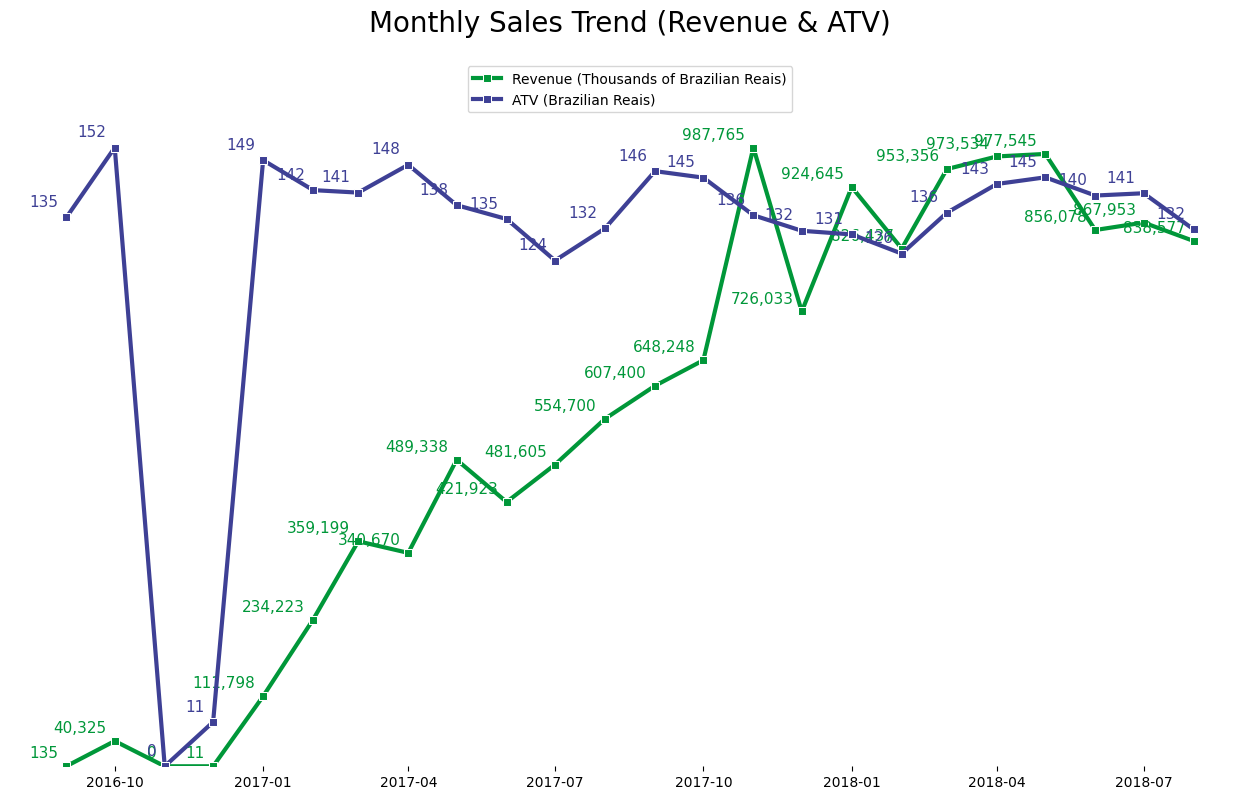

In [70]:
fields = ['Revenue', 'ATV']
labels = ['Revenue (Thousands of Brazilian Reais)', 'ATV (Brazilian Reais)']

# Ensure 'Year_Month' is in datetime format
df_orders_monthly['Year_Month'] = pd.to_datetime(df_orders_monthly['Year_Month'])

# Plot the monthly sales trend
fig, ax1 = plt.subplots(figsize=(16, 9))

# Set the background color
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Plot Revenue on the primary y-axis
line1 = sns.lineplot(x="Year_Month", y=fields[0], data=df_orders_monthly,
                            ax=ax1, color=color1, linewidth=3, marker='s', label=labels[0])

# Add secondary y-axis
ax2 = ax1.twinx()
line2 = sns.lineplot(x="Year_Month", y=fields[1], data=df_orders_monthly,
                        ax=ax2, color=color2, linewidth=3, marker='s', label=labels[1])

# ax1.set_xlabel("Year_Month")
ax1.xaxis.label.set_visible(False)  # Hide the x-axis title

# ax1.set_ylabel(labels[0])
# ax1.tick_params('y')
# ax2.set_ylabel(labels[1])
# ax2.tick_params('y')

# Add data labels
axises = [ax1, ax2]
for field in fields:
    x_offset = pd.Timedelta(days=-5)
    avg_value = df_orders_monthly[field].mean()
    y_offset = 0.015 * avg_value
    
    if field == 'Revenue':
        ax = ax1
        color = color1
    else:
        ax = ax2
        color = color2
    for x, y in zip(df_orders_monthly['Year_Month'], df_orders_monthly[field]):
        ax.text(x + x_offset, y + y_offset, f'{y:,.0f}', ha='right', va='bottom', fontsize=11, color=color)

# Set x-axis major ticks to show month names and minor ticks to show years
# ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month
ax1.xaxis.set_minor_locator(mdates.YearLocator())  # Minor ticks for each year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Show as YYYY-MM

# Format the x-axis for better spacing
plt.setp(ax1.xaxis.get_majorticklabels(), ha='center', rotation=0)

# Hide spines for both axes
spines_to_hide = ['top', 'left', 'right', 'bottom']
for ax in axises:
    for spine in spines_to_hide:
        ax.spines[spine].set_visible(False)

# Remove y-axis labels and the y-axis itself
for ax in axises:
    ax.set_ylabel('')
    ax.yaxis.set_visible(False)

plt.title(title1, fontsize=20, pad=30)

# Set new limits for the y-axes to create space for the legend
ax1.set_ylim(0, df_orders_monthly[fields[0]].max() * 1.12)
ax2.set_ylim(0, df_orders_monthly[fields[1]].max() * 1.12)

# Combine legends from both axes into one
handles, labels = ax1.get_legend_handles_labels()  # Get handles and labels from ax1
handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels from ax2
handles.extend(handles2)  # Combine handles
labels.extend(labels2)  # Combine labels
ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02))  # Single legend for both lines

# Remove automatic legend from ax2
ax2.get_legend().remove()

plt.show()

**Insight:**
- Revenue cenderung meningkat signifikan tiap waktu, namun ATV stagnan
- Terjadi penurunan signifikan pada November - Desember 2016

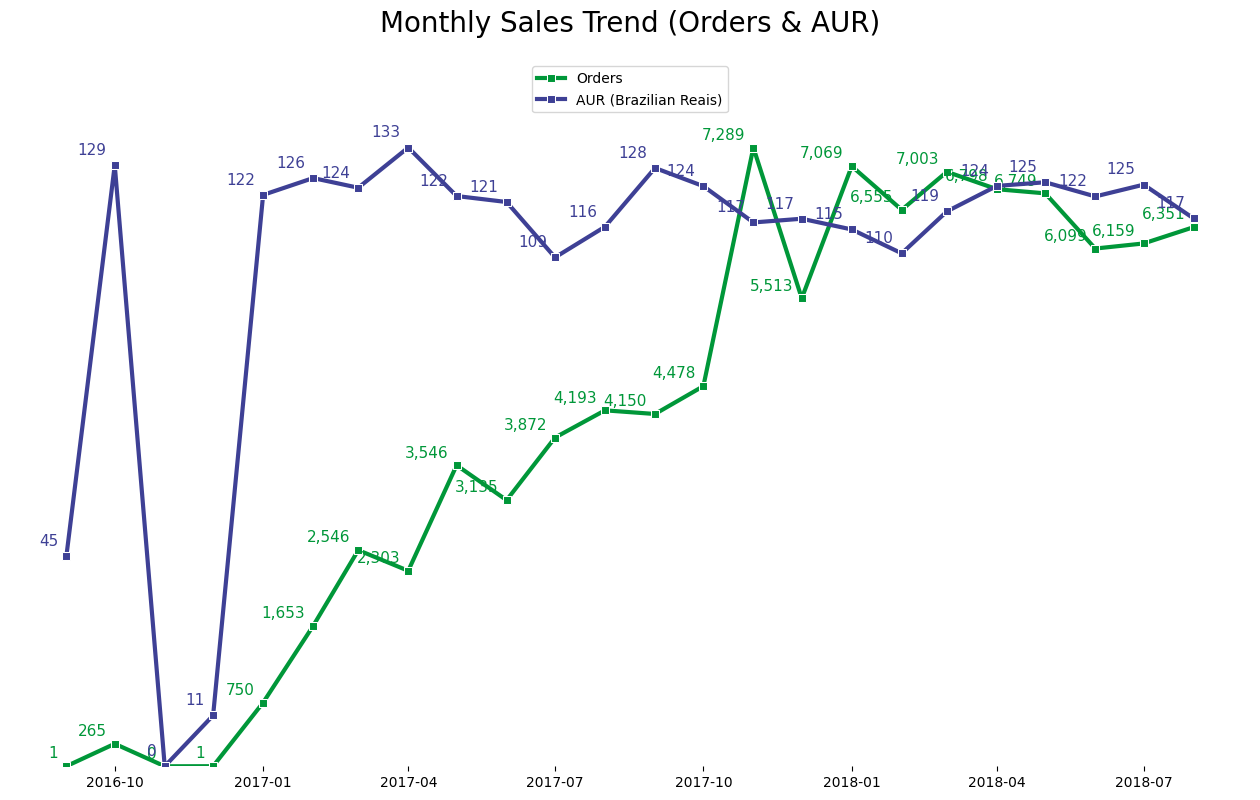

In [71]:
title2 = 'Monthly Sales Trend (Orders & AUR)'

fields = ['Orders', 'AUR']
labels = ['Orders', 'AUR (Brazilian Reais)']

# Ensure 'Year_Month' is in datetime format
df_orders_monthly['Year_Month'] = pd.to_datetime(df_orders_monthly['Year_Month'])

# Plot the monthly sales trend
fig, ax1 = plt.subplots(figsize=(16, 9))

# Set the background color
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Plot Revenue on the primary y-axis
line1 = sns.lineplot(x="Year_Month", y=fields[0], data=df_orders_monthly,
                            ax=ax1, color=color1, linewidth=3, marker='s', label=labels[0])

# Add secondary y-axis
ax2 = ax1.twinx()
line2 = sns.lineplot(x="Year_Month", y=fields[1], data=df_orders_monthly,
                        ax=ax2, color=color2, linewidth=3, marker='s', label=labels[1])

ax1.xaxis.label.set_visible(False)  # Hide the x-axis title

# Add data labels
axises = [ax1, ax2]
for field in fields:
    x_offset = pd.Timedelta(days=-5)
    avg_value = df_orders_monthly[field].mean()
    y_offset = 0.015 * avg_value

    if field == 'Orders':
        ax = ax1
        color = color1
    else:
        ax = ax2
        color = color2
    for x, y in zip(df_orders_monthly['Year_Month'], df_orders_monthly[field]):
        ax.text(x + x_offset, y + y_offset, f'{y:,.0f}', ha='right', va='bottom', fontsize=11, color=color)

# Set x-axis major ticks to show month names and minor ticks to show years
# ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month
ax1.xaxis.set_minor_locator(mdates.YearLocator())  # Minor ticks for each year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Show as YYYY-MM

# Format the x-axis for better spacing
plt.setp(ax1.xaxis.get_majorticklabels(), ha='center', rotation=0)

# Hide spines for both axes
spines_to_hide = ['top', 'left', 'right', 'bottom']
for ax in axises:
    for spine in spines_to_hide:
        ax.spines[spine].set_visible(False)

# Remove y-axis labels and the y-axis itself
for ax in axises:
    ax.set_ylabel('')
    ax.yaxis.set_visible(False)

plt.title(title2, fontsize=20, pad=30)

# Set new limits for the y-axes to create space for the legend
ax1.set_ylim(0, df_orders_monthly[fields[0]].max() * 1.12)
ax2.set_ylim(0, df_orders_monthly[fields[1]].max() * 1.12)

# Combine legends from both axes into one
handles, labels = ax1.get_legend_handles_labels()  # Get handles and labels from ax1
handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels from ax2
handles.extend(handles2)  # Combine handles
labels.extend(labels2)  # Combine labels
ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02))  # Single legend for both lines

# Remove automatic legend from ax2
ax2.get_legend().remove()

plt.show()

**Insight:**
- Trend Orders & AUR cenderung menyerupai Revenue & ATV dimana Orders cenderung meningkat signifikan tiap waktu sedangkan AUR stagnan
- Terjadi penurunan signifikan pada November - Desember 2016

### 2. Kategori produk apa saja yang paling tinggi penjualannya (orders, revenue, unit)?

In [72]:
# df_category_top_orders[['product_category_name_english', 'orders', 'orders_rank']].head(10)

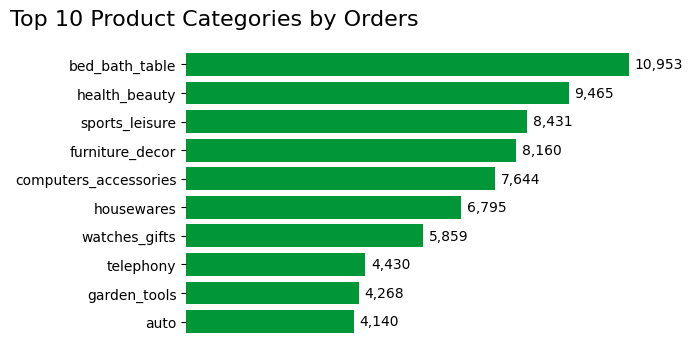

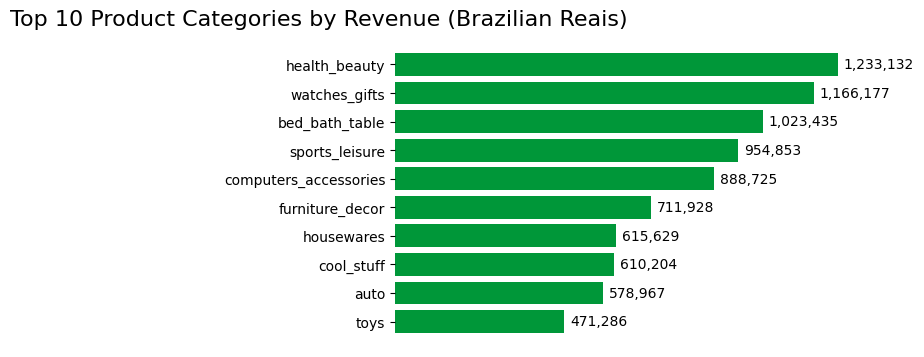

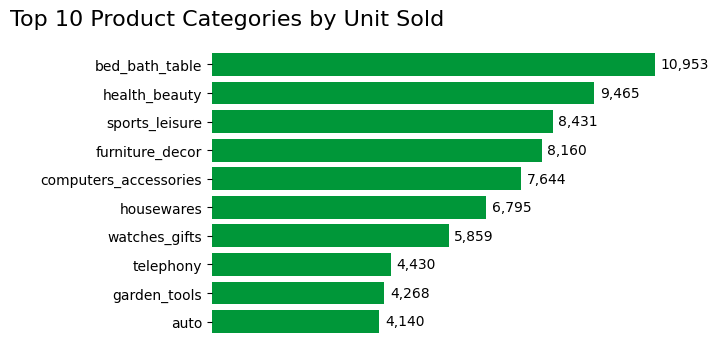

In [73]:
title_field_df_dict = {
    'Top 10 Product Categories by Orders': ['orders', df_category_top_orders],
    'Top 10 Product Categories by Revenue (Brazilian Reais)': ['revenue', df_category_top_revenue],
    'Top 10 Product Categories by Unit Sold': ['unit', df_category_top_unit],
}

# Reverse the order of the bars
for title, field_df in title_field_df_dict.items():
    df_category_top10 = field_df[1][['product_category_name_english', field_df[0], f'{field_df[0]}_rank']].head(10)
    df_category_top10 = df_category_top10.sort_values(field_df[0], ascending=True)  # Sort in ascending order for reverse effect

    # Plot the horizontal bar chart
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.barh(df_category_top10['product_category_name_english'], df_category_top10[field_df[0]], color=color1)

    # Calculate the average width of the bars
    average_width = sum(bar.get_width() for bar in bars) / len(bars)
    offset = 0.02 * average_width  # 2% of the average width

    # Add data labels
    for bar in bars:
        ax.text(bar.get_width() + offset,  # Position slightly to the right of the bar
                bar.get_y() + bar.get_height() / 2,  # Center vertically
                f'{bar.get_width():,.0f}',  # Format number with commas
                va='center', fontsize=10, color='black')
        
    ax.set_title(title, fontsize=16, pad=10, ha='right')

    # Hide spines
    spines_to_hide = ['top', 'left', 'right', 'bottom']
    for spine in spines_to_hide:
        ax.spines[spine].set_visible(False)

    # Remove x-axis
    ax.xaxis.set_visible(False)

    plt.show()


**Insight:**
- Kategori produk yang paling laku adalah bed_bath_table, sedangkan yang paling banyak menghasilkan revenue atau memiliki nilai transaksi terbesar adalah health_beauty
- bed_bath_table memiliki 10,953 orders, tiap orders terdiri dari 1 item saja.
- health_beauty telah menghasilkan revenue sebesar 1,233,132 real brazil.

### 3. Kategori produk apa saja yang paling rendah penjualannya (orders, revenue, unit)?

In [74]:
# df_category_bottom_orders[['product_category_name_english', 'orders', 'orders_rank']].head(10)

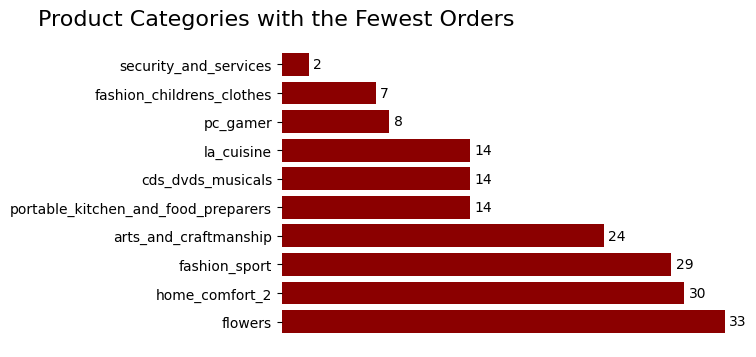

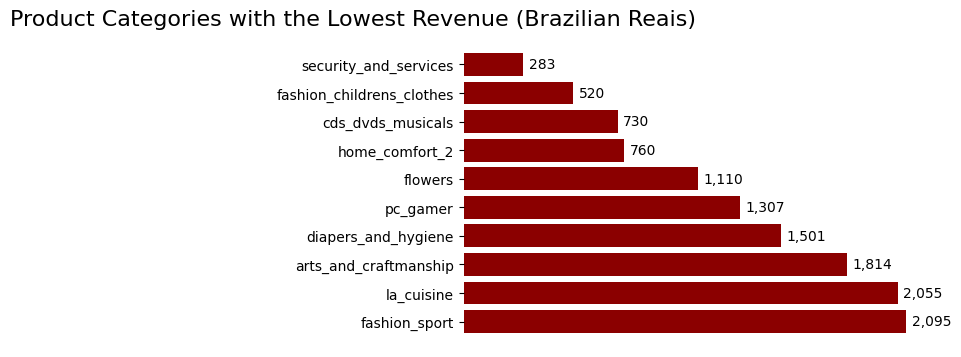

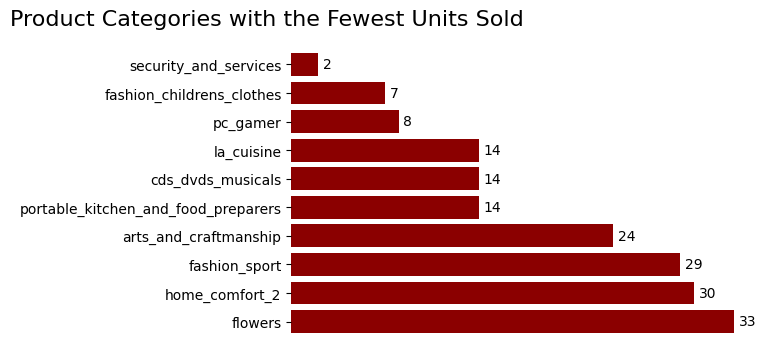

In [75]:
title_field_df_dict = {
    'Product Categories with the Fewest Orders': ['orders', df_category_bottom_orders],
    'Product Categories with the Lowest Revenue (Brazilian Reais)': ['revenue', df_category_bottom_revenue],
    'Product Categories with the Fewest Units Sold': ['unit', df_category_bottom_unit],
}

# Reverse the order of the bars
for title, field_df in title_field_df_dict.items():
    df_category_bottom10 = field_df[1][['product_category_name_english', field_df[0], f'{field_df[0]}_rank']].head(10)
    df_category_bottom10 = df_category_bottom10.sort_values(field_df[0], ascending=False)  # Sort in ascending order for reverse effect

    # Plot the horizontal bar chart
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.barh(df_category_bottom10['product_category_name_english'], df_category_bottom10[field_df[0]], color=color3)

    # Calculate the average width of the bars
    average_width = sum(bar.get_width() for bar in bars) / len(bars)
    offset = 0.02 * average_width  # 2% of the average width

    # Add data labels
    for bar in bars:
        ax.text(bar.get_width() + offset,  # Position slightly to the right of the bar
                bar.get_y() + bar.get_height() / 2,  # Center vertically
                f'{bar.get_width():,.0f}',  # Format number with commas
                va='center', fontsize=10, color='black')
        
    ax.set_title(title, fontsize=16, pad=10, ha='right')

    # Hide spines
    spines_to_hide = ['top', 'left', 'right', 'bottom']
    for spine in spines_to_hide:
        ax.spines[spine].set_visible(False)

    # Remove x-axis
    ax.xaxis.set_visible(False)

    plt.show()


**Insight:**
- Kategori produk dengan revenue, orders, dan jumlah unit terjual paling sedikit adalah security_and_service
- kategori security_and_service hanya terjual 2 unit dalam 2 order senilai total 283 Real Brazil sepanjang rentang waktu yang tersedia di dataset

### 4. Metode pembayaran apa yang paling sering digunakan?

In [76]:
payment_types_orders

,orders
payment_type,
credit_card,"76,505"
boleto,"19,784"
voucher,"3,866"
debit_card,"1,528"
not_defined,3


In [77]:
show_table_info(payment_types_orders, "payment_type_orders")

,Table,Column,DType,Not-Null,Missing Values,Unique,Duplicate,Memory Usage
0,Payment_Type_Orders,orders,object,5,0,5,,268 Bytes
1,Payment_Type_Orders,[Total],,5,0,5,0,558 Bytes


tipe data 'orders' adalah string karena sebelumnya kita perlu buat tabel yang datanya mudah dibaca, mari kita kembalikan ke float untuk tahap selanjutnya

In [78]:
# Safely convert 'orders' column from string to float
if payment_types_orders['orders'].dtype == 'object':
    payment_types_orders['orders'] = payment_types_orders['orders'].str.replace(',', '').astype(float)

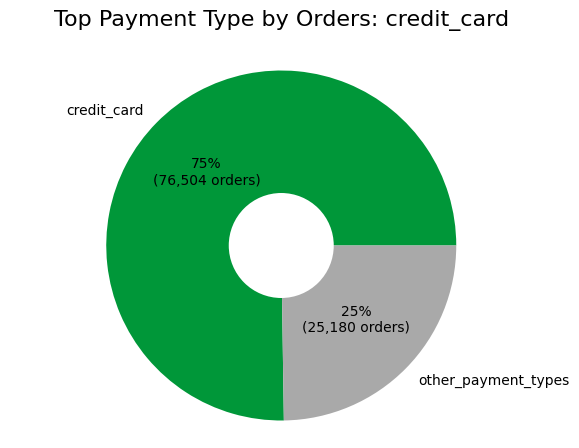

In [79]:
# Sort the data in descending order
sorted_data = payment_types_orders.sort_values('orders', ascending=False)

# Get the top payment type
top_payment_type = sorted_data.index[0]
top_payment_orders = sorted_data.loc[top_payment_type, 'orders']

# Sum up the rest of the payment types
other_payment_types = sorted_data.iloc[1:]
other_orders = other_payment_types['orders'].sum()

# Prepare data for pie chart
pie_labels = [top_payment_type, 'other_payment_types']
pie_orders = [top_payment_orders, other_orders]

# Create the pie chart
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(
    pie_orders,
    labels=pie_labels, 
    autopct=lambda pct: f"{pct:.0f}%\n({int(pct/100 * sum(pie_orders)):,} orders)", 
    colors=[color1, color4],
    startangle=0
)

# Create a white center circle to make it doughnut chart
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
ax.add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is circular
ax.axis('equal')

# Dynamically set the title
ax.set_title(f'Top Payment Type by Orders: {top_payment_type}', fontsize=16, pad=20)

plt.show()

**Insight:**
- Metode pembayaran yang paling banyak digunakan adalah credit_card dengan total order 76,504 atau sebesar 75% dari total orders yang sudah dibayar

### 5. Berapa rata-rata nilai pembayaran untuk setiap metode pembayaran?

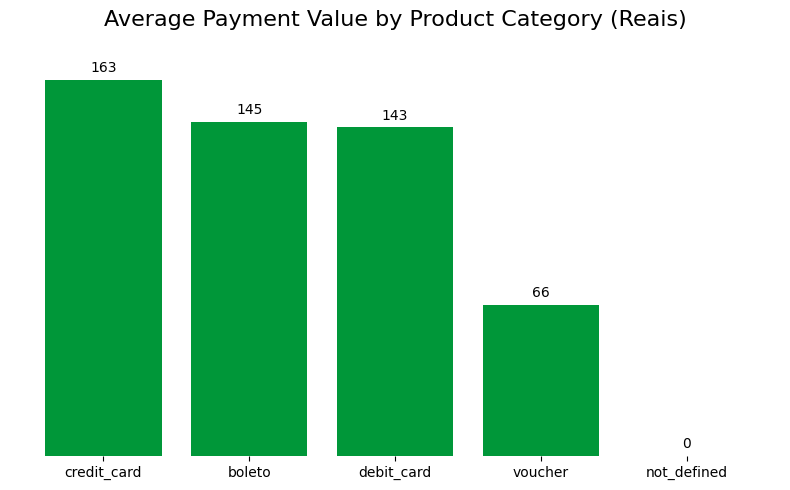

In [80]:
# Sort values by 'avg_value' for better visual ordering
df_payments_avg_value = df_payments_avg_value.sort_values('avg_value', ascending=False)

# Plot the vertical bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(
    df_payments_avg_value.index,
    df_payments_avg_value['avg_value'],
    color=color1,
)

# Calculate the average height of the bars
average_height = sum(bar.get_height() for bar in bars) / len(bars)
offset = 0.02 * average_height  # 2% of the average height

# Add data labels
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + offset,
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Set the title and labels
title = "Average Payment Value by Product Category (Reais)"
ax.set_title(title, fontsize=16, pad=25, ha='center')
# ax.set_ylabel('Average Value', fontsize=12)
# ax.set_xlabel('Payment Type', fontsize=12)

# Optional: Add gridlines for better readability
# ax.grid(axis='y', linestyle='--', alpha=0.6)

# Hide spines
spines_to_hide = ['top', 'left', 'right', 'bottom']
for spine in spines_to_hide:
    ax.spines[spine].set_visible(False)

# Remove y-axis
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()


**Insight:** 
- Rata-rata nilai transaksi untuk tiap metode pembayaran cukup beragam
- Credit card memiliki rata-rata nilai transaksi tertinggi, diikuti oleh boleto dan debit_card di urutan kedua dan ketiga
- Voucher dan not_defined memiliki rata-rata nilai transaksi terendah

### 6. Seberapa akurat estimasi pengiriman dibandingkan dengan tanggal pengiriman sebenarnya?

In [81]:
orders_by_delivery_status_summary

,Count,Percentage
delivery_status,,
Early,7834,8.119986
Late,87182,90.364643
On-Time,1462,1.515371


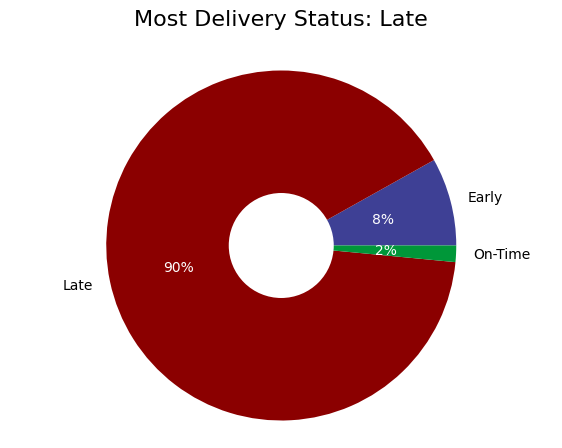

In [82]:
# Sort the data in descending order
sorted_data = orders_by_delivery_status_summary.sort_values('Count', ascending=False)

# Get the top payment type
most_delivery_status = sorted_data.index[0]

# Prepare data for pie chart
pie_labels = orders_by_delivery_status_summary.index
pie_count = orders_by_delivery_status_summary['Count']

# Create the pie chart
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(
    pie_count,
    labels=pie_labels, 
    # autopct=lambda pct: f"{pct:.0f}%\n({int(pct/100 * sum(pie_orders)):,} orders)", 
    autopct=lambda pct: f"{pct:.0f}%", 
    colors=[color2, color3, color1],
    startangle=0
)

# Style the autopct text (percentage text)
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text color to white

# Create a white center circle to make it doughnut chart
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
ax.add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is circular
ax.axis('equal')

# Dynamically set the title
ax.set_title(f'Most Delivery Status: {most_delivery_status}', fontsize=16, pad=20)

plt.show()

**Insight:**
- 90% orders tiba terlambat dibandingkan dengan waktu estimasinya
- 8% orders tiba lebih awal dari waktu estimasi
- 2% orders tiba pada tanggal yang sama dengan estimasi

### 7. Berapa nilai minimal, maksimal, dan rata-rata biaya pengiriman per kategori produk secara total dan rata-rata per order?

In [83]:
df_orders_product_category_freight.head()

,product_category_name_english,orders,avg_freight_value,total_freight_value
15,computers,199,48.570955,9665.62
46,home_appliances_2,231,44.392078,10254.57
42,furniture_mattress_and_upholstery,37,42.739730,1581.37
52,kitchen_dining_laundry_garden_furniture,274,42.120401,11540.99
39,furniture_bedroom,103,42.013786,4327.42


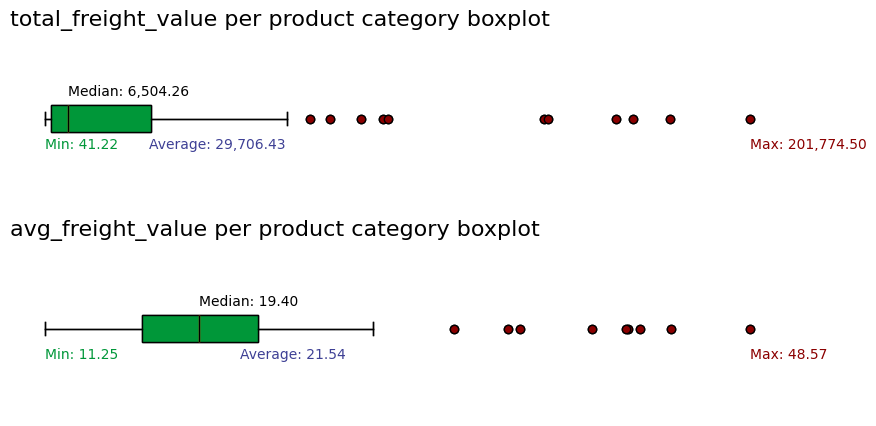

In [84]:
# Filter only numeric columns
# numeric_columns = df_orders_product_category_freight.select_dtypes(include='number')
numeric_columns = df_orders_product_category_freight[['total_freight_value', 'avg_freight_value']]

# Create horizontal boxplots for each numeric column
fig, axes = plt.subplots(
    nrows=len(numeric_columns.columns), 
    ncols=1, 
    figsize=(10, 5), 
    sharex=False
)

for ax, column in zip(axes, numeric_columns.columns):
    # Create the boxplot
    box = ax.boxplot(numeric_columns[column], vert=False, patch_artist=True)

    # Create the boxplot with custom colors
    box = ax.boxplot(numeric_columns[column], 
                     vert=False, 
                     patch_artist=True,
                     boxprops=dict(facecolor=color1),  # Set box color
                     medianprops=dict(color='black'),   # Set median line color
                    #  whiskerprops=dict(color='black'),  # Set whisker line color
                    #  capprops=dict(color='black'),  # Set cap line color
                     flierprops=dict(markerfacecolor=color3, marker='o'))  # Set outlier color
    
    
    # Calculate min, max, and mean
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    mean_value = numeric_columns[column].mean()
    median_value = numeric_columns[column].median()

    # Add data labels for min, max, and mean
    min_label = f'Min: {min_value:,.2f}'
    mean_label = f'Average: {mean_value:,.2f}'
    max_label = f'Max: {max_value:,.2f}'
    median_label = f'Median: {median_value:,.2f}'
    # if column == 'orders':
    #     min_label = f'Min: {min_value:,.0f}'
    #     mean_label = f'Average: {mean_value:,.0f}'
    #     max_label = f'Max: {max_value:,.0f}'
    #     median_label = f'Median: {median_value:,.0f}'
        
    ax.text(min_value, 0.85, min_label, color=color1, fontsize=10, va='center')
    ax.text(mean_value, 0.85, mean_label, color=color2, fontsize=10, va='center')
    ax.text(max_value, 0.85, max_label, color=color3, fontsize=10, va='center')
    ax.text(median_value, 1.15, median_label, color='black', fontsize=10, va='center')

    # Add title for each boxplot
    ax.set_title(f"{column} per product category boxplot", pad=0, fontsize=16, loc='left')

    # Remove axes and grid
    ax.axis('off')

# Adjust layout for readability
# plt.tight_layout()
plt.show()

**Insight:**
- Total biaya pengiriman per kategori produk (dalam Real Brazil) berada pada rentang 41.22 (minimal) sampai dengan 201,774.50 (maksimal) dengan rata-rata 29,706.43
- Rata-rata biaya pengiriman per order per kategori produk (dalam Real Brazil) berada pada rentang 11.25 (minimal) sampai dengan 48.57 (maksimal) dengan rata-rata 21.54

### 8. Bagaimana tingkat kepuasan pelanggan secara keseluruhan?

In [85]:
review_scores_summary

,Count,Percentage
review_score,,
1,11424,11.513344
2,3151,3.175643
3,8179,8.242965
4,19142,19.291704
5,57328,57.776344


In [86]:
from matplotlib.colors import to_rgba

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white.

    Args:
        color: The original color (name, hex, or RGB tuple).
        amount: Amount to lighten the color (0.0 - no change, 1.0 - white).

    Returns:
        Lightened color as an RGBA tuple.
    """
    color = to_rgba(color)  # Convert to RGBA
    white = (1, 1, 1, 1)   # RGBA for white
    return tuple(color[i] + (white[i] - color[i]) * amount for i in range(4))

color1lighten = lighten_color(color1, amount=0.25)  # sudah dicoba pakai warna ini untuk skor 4, kurang bagus
color3lighten = lighten_color(color3, amount=0.25)  # sudah dicoba pakai warna ini untuk skor 2, kurang bagus

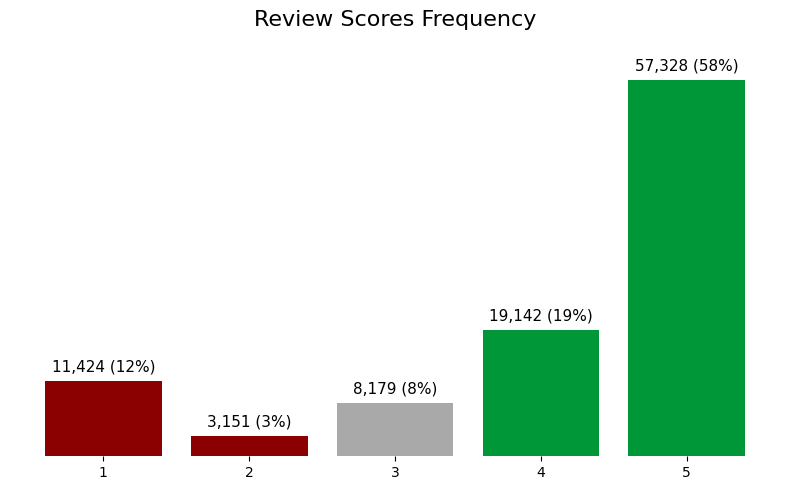

In [87]:
# Sort values by 'review_score' for better visual ordering
sorted_data = review_scores_summary.sort_index(ascending=False)

# Plot the vertical bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(
    sorted_data.index,
    sorted_data['Count'],
    color=[color1, color1, color4, color3, color3]
)

# Calculate the average height of the bars
average_height = sum(bar.get_height() for bar in bars) / len(bars)
offset = 0.05 * average_height  # 2% of the average height

# Calculate the total count for percentages
total_count = sum(bar.get_height() for bar in bars)

# Add data labels with percentages
for bar in bars:
    count = bar.get_height()
    percentage = (count / total_count) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        count + offset,  # Y-coordinate
        f'{count:,.0f} ({percentage:.0f}%)',  # Label with percentage
        ha='center', va='bottom', fontsize=11, color='black'  # Text styling
    )

# Set the title and labels
title = "Review Scores Frequency"
ax.set_title(title, fontsize=16, pad=25, ha='center')

# Hide spines
spines_to_hide = ['top', 'left', 'right', 'bottom']
for spine in spines_to_hide:
    ax.spines[spine].set_visible(False)

# Remove y-axis
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

**Insight:**
- Sebagian besar review adalah positif, yaitu sebanyak 57,328 (58%) skor 5 dan 19,142 (19%) skor 4
- Review negatif yang diperoleh adalah sebanyak 11,424 (12%) skor 1 dan 3,151 (3%) skor 2
- Hanya sebagian kecil review skor 3 (netral) yaitu sebanyak 8,179 (8%)

## Analisis Lanjutan (Geospatial Analysis)

### 9. Bagaimana distribusi pelanggan berdasarkan lokasi geografisnya?

**Insight:**
- xxx
- xxx

### 10. Bagaimana distribusi penjual berdasarkan lokasi geografisnya?

**Insight:**
- xxx
- xxx

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2